# Wind Energy Generation Predictive Maintenance Project

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
ReneWind is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential. Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.


## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Model Goal 

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.


## Wind turbines maintenance and reparation

Every technical system needs routine maintenance to ensure adequate service life. Highly complex systems such as wind turbines require regular inspection to guarantee trouble-free operation. A differentiation needs to be made between inspection, maintenance and repair. The inspection of a wind turbine requires a visual evaluation of the entire structure without any remedial work being performed. Such an inspection of a wind turbine can take approximately one day. 

The maintenance of wind turbines takes place at predetermined intervals, usually once or twice a year whereby all important mechanical and electrical assemblies are checked. In addition, minor repairs can be performed and consumables such as greases, oils and filters can be exchanged. On average, this requires about 20 working hours.

More serious damage, above all to the rotor blades, is rectified during repairs. Depending on the extent and complexity of the damage, this can take up to a few days. While mechanical assemblies tend to be less prone to damage, areas such as the electrics, electronics, sensors and hydraulics require more frequent repair. However, such repairs normally result in little down-time and are relatively simple.

On the other hand, repairs for gearboxes, rotor blades or the generator are extremely complex. Spare parts are expensive and the repair work requires significantly longer down-times. Damage also occurs frequently to the tower’s foundation, flanges and the tower, above all in the form of corrosion. Damage to the rotor blades is usually the result of erosion and lightning strikes.


Source: https://www.renolit.com/en/industries/wind-energy/renolit-cp/wind-turbines-maintenance-and-reparation/wind-turbines-maintenance-and-reparation


## Observations and Model Selection 

### Final Selection 

AdaBoost Model with OverSampling data

* Recall is good in training for both GridSearchCV and RandomSearchCV 
* Recall is also good for validation for both GridSearchCV and RandomSearchCV 
* Recall is highest in validation with the exception of XGB Model Building with UnderSampling data 
* Precision is also good in training and validation for both GridSearchCV and RandomSearchCV  

GradBoost Model with UnderSampling data is also a good model, but its precision score is lower than AdaBoost Model with OverSampling data.  

## Business Insights

The top 10 predictors are: 
1. V32
2. V12
3. V37
4. V30 
5. V18 
6. V39 
7. V3
8. V26 
9. V9 
10. V14

* Of the 20,000 observations in the training set, 18,890 or 94.5% did not fail for the reported observations
* 1110 observations or 5.56% did fail for the reported observation  
* Overall, the correct set of predictors is being used 
* Some predictors like V2 and V14 that are highly correlated -- additional information is required to determine if both predictors are needed for the models 

## Recommendations 

1. Use the AdaBoost Model with Over Sampling data as the model to determine failure or no failure 
    * See Future Recommendations for additional suggestions 
2. In the majority of cases, the given predictors did accurately predict no failure 
3. The model will limit the replacement costs and inspection costs when a replacement or inspection is not warranted 
4. The model will find the True Positives and True Negatives 
5. The chosen model should generalize well 


## Future Recommendations 

1. Expand the number of observations to determine if the results change 
2. Add month and/or season to determine if there is any correlation between a failure and time of year 
3. Out of scope for this project, but consider funding further testing to determine if the AdaBoost Model with Over Sampling data or the Gradiant Boost Model with Under Sampling data is the most ideal model 
    * Determine if and how the hyperparameters need to be modified or changed 
4. Develop a stacking model to use both AdaBoost Model with Over Sampling data and the Gradiant Boost Model with Under Sampling data
    * The two models produce very similar results 
5. The IEEE and other organizations have a number of research papers on predictive maintenance for wind turbines 


## Importing libraries

In [1]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## Function Definitions


In [2]:
# code to enable the printing of headers in bold and maybe colors


class color:
    PURPLE = "\033[95m"
    CYAN = "\033[96m"
    DARKCYAN = "\033[36m"
    BLUE = "\033[94m"
    GREEN = "\033[92m"
    YELLOW = "\033[93m"
    RED = "\033[91m"
    BOLD = "\033[1m"
    UNDERLINE = "\033[4m"
    END = "\033[0m"


# print(color.BOLD + 'Hello World !' + color.END)

<IPython.core.display.Javascript object>

In [3]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default True)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=True, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=True, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [4]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [5]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [6]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [7]:
# function to get a value count and percentage for a column in a dataset


def count_percentage(data, contents):

    """
    To get a value count on a column and its percentage 

    data: dataframe
    contents: column to be counted
   
    """

    tempdf = pd.DataFrame(columns=[contents, "Percentage"])
    tempdf[contents] = data[contents].value_counts()
    tempdf["Percentage"] = data[contents].value_counts(normalize=True)

    print(contents, "with percentage of total \n")
    print(tempdf)

    del tempdf  # free memory


<IPython.core.display.Javascript object>

## Loading Data

Loading and reviewing the training data first and then will work on the test data. 

### Load Training Data

In [8]:
# read the data
df = pd.read_csv(
    "C:/Users/David/LibreOffice_Personal/DataScience/TestData_Files/Train.csv"
)
# Ran code on local machine using Anaconda

df.sample(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
11279,1.255,1.648,3.304,3.876,-2.019,-0.747,-1.810,-3.598,2.415,-0.166,-0.479,-1.280,1.817,-2.500,-4.245,-7.914,-0.447,-0.486,5.199,0.586,-7.561,1.799,-2.798,1.583,-0.611,2.715,-1.566,0.101,0.040,2.244,-3.164,0.069,2.225,0.221,6.643,-3.789,-1.982,1.640,-0.414,-4.825,0
8359,2.618,-2.467,5.328,-5.346,-2.355,0.069,-0.568,-1.288,-0.559,1.807,0.604,1.556,3.611,0.082,-0.749,-1.935,-5.295,0.875,-0.106,-1.094,-4.057,-0.184,-4.470,-4.860,2.097,0.571,6.374,-3.236,-0.002,-1.074,3.393,-5.775,-0.191,0.144,2.362,5.764,0.123,-2.332,2.457,0.916,0
8466,4.888,4.298,4.062,-5.624,0.396,4.437,1.555,-8.889,1.630,1.246,1.994,-2.736,-0.547,-2.953,1.709,-7.120,-5.825,1.707,-1.541,-8.212,-2.255,-0.015,-7.860,-3.719,2.445,5.442,8.517,-2.011,-0.712,-6.111,1.698,-11.078,0.854,-1.443,-2.532,2.381,-1.379,8.739,3.007,2.678,0
3641,-0.712,1.779,-3.331,5.446,0.663,-1.113,-0.798,0.337,2.208,-2.105,-2.011,-1.242,-0.578,-0.373,-2.681,-2.824,4.753,0.178,1.335,2.506,-1.657,2.457,4.533,4.208,-1.428,-0.065,-5.621,2.262,-1.325,1.694,-4.688,5.234,-0.468,-0.914,1.131,-5.690,-0.220,0.206,-2.336,-2.686,0
10307,-0.645,-0.095,0.944,-1.256,-1.635,0.095,1.450,-0.348,-1.556,0.146,1.102,4.583,-1.622,-1.794,2.489,-0.176,1.080,-0.203,3.489,1.084,0.853,-0.468,-2.067,-1.661,0.902,-2.148,1.682,1.453,1.576,-0.080,-3.257,-7.628,-2.601,4.389,-1.052,0.769,1.795,3.642,1.738,0.837,0
1769,1.957,-4.267,4.605,-0.404,-3.499,-3.172,-2.503,3.079,1.565,-1.116,-2.530,0.691,4.450,1.329,-2.803,-1.425,0.802,0.088,0.090,6.858,-5.473,0.373,-1.515,-4.964,2.618,-2.175,0.847,-2.186,0.087,1.691,0.717,-2.416,-2.573,-0.175,4.318,2.747,1.298,-10.155,-0.197,-0.113,0
5791,8.602,4.950,4.511,1.021,-1.982,0.551,-0.298,-6.709,5.962,-1.743,-1.019,-4.373,2.607,-2.654,-2.532,-11.754,-1.426,-0.387,1.308,-2.435,-9.632,3.289,-4.388,-2.718,2.869,5.802,4.218,-1.610,-2.680,-3.657,-1.937,-6.309,-1.379,-3.020,3.626,-3.879,-2.493,1.899,-0.809,-1.430,0
17707,-4.661,2.582,-0.046,4.484,3.186,-1.020,0.775,2.428,-5.631,2.302,-1.867,2.930,-7.998,-2.354,3.839,3.226,4.022,-1.071,5.776,-2.618,3.492,-1.120,1.131,12.491,-2.887,0.960,-7.404,3.465,0.922,2.244,3.693,9.752,3.574,1.771,3.218,-1.098,-2.231,6.046,-1.328,-1.227,0
11914,0.568,-0.682,2.531,1.626,-0.681,-1.905,-1.851,0.922,0.657,-0.427,-2.925,-0.033,1.176,-0.242,-2.604,-2.985,1.568,0.806,1.227,2.432,-4.509,1.343,0.205,1.788,0.470,0.554,-2.125,-0.560,-0.908,1.274,0.822,2.714,0.050,-1.287,4.183,0.315,-0.394,-3.620,-0.742,-1.234,0
16287,-4.599,-6.283,-2.613,-1.800,-0.221,-0.206,-2.031,1.084,-2.383,2.880,-3.764,2.395,-0.917,2.037,-2.176,-1.446,1.977,5.430,0.237,4.418,0.425,2.755,3.794,3.725,0.107,-7.160,-0.269,2.365,-2.693,1.018,-2.194,2.539,-2.201,2.348,-0.519,5.060,2.601,-0.598,2.081,-1.068,0


<IPython.core.display.Javascript object>

### Training Data Overview

In [8]:
print("There are", df.shape[0], "rows and", df.shape[1], "columns.")

There are 20000 rows and 41 columns.


<IPython.core.display.Javascript object>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

<IPython.core.display.Javascript object>

In [8]:
df.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

### Notes 

V1 and V2 have 18 missing values which is only 0.09% of the overall data.  The values can be imputed later once the data has been split.  I do not see the imputation as affecting the overall data results that much.  

No duplicated data

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108


<IPython.core.display.Javascript object>

### Notes

Since the data is encrypted, it is hard to determine what the ranges mean for each variable and when any number is too high or too low.  The data has to be used "as-is" without any changes or updates.  The only thing that can be done is to impute the missing values for the V1 and V2 variables. 

Target with percentage of total 

   Target  Percentage
0   18890       0.945
1    1110       0.056
--------------------------------------------------




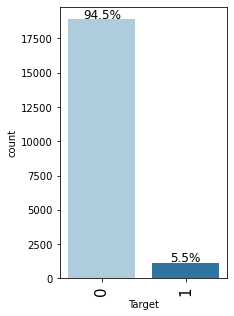

<IPython.core.display.Javascript object>

In [25]:
count_percentage(df, "Target")
print("-" * 50)
print("\n")
labeled_barplot(df, "Target")

### Notes

The data is definitely imbalanced for the Target variable.  There are far more zeroes that ones.  The only thing that can be assumed is zero means success and one means failure -- the wind turbine failed and the failure was not accurately predicted. 

### Load Test Data

In [10]:
# read the data
testdf = pd.read_csv(
    "C:/Users/David/LibreOffice_Personal/DataScience/TestData_Files/Test.csv"
)
# Ran code on local machine using Anaconda

testdf.sample(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
795,-7.686,-4.753,-4.337,2.775,0.791,-0.773,-2.901,4.237,-2.173,-0.336,-0.700,0.862,-0.874,1.420,-3.487,3.627,3.624,2.684,-0.251,5.213,2.478,-0.001,5.213,4.713,-3.488,-5.170,-8.355,1.858,2.827,7.392,-2.546,9.112,3.930,-0.097,1.770,-0.980,1.836,-3.471,-1.134,-1.628,0
1879,-2.468,-5.531,-0.380,-4.819,-0.596,0.246,-1.006,2.109,-1.460,1.437,0.683,1.042,3.293,3.015,-1.153,4.184,-3.315,1.923,-3.921,1.866,2.253,-1.234,0.482,-4.509,0.313,-3.494,3.100,-1.974,0.351,0.487,2.061,-0.899,-0.209,0.331,-2.251,6.072,2.147,-4.966,2.176,1.477,0
1138,3.994,-1.518,-1.321,-0.416,-3.003,-1.225,1.963,2.195,0.530,0.805,3.148,1.368,2.852,2.150,2.036,3.368,-2.748,-4.328,1.654,0.692,0.241,0.285,1.515,-4.512,0.738,-2.311,4.816,-0.275,-0.846,-0.464,-0.966,-1.692,-3.334,2.685,0.265,-1.387,-0.546,-2.738,-0.840,-1.658,1
3100,4.869,1.557,5.390,-1.499,-2.320,-1.185,0.935,-1.960,2.248,-0.454,-1.057,0.866,2.691,-0.951,0.793,-3.807,-1.326,-1.759,1.384,0.607,-4.089,-0.113,-4.906,-5.914,3.576,2.414,5.769,-1.673,-1.926,-4.617,0.326,-9.369,-4.890,1.631,0.039,2.048,0.028,-1.115,1.597,0.501,0
2623,-1.655,-3.188,1.305,-4.953,0.480,-0.329,0.143,1.714,-3.636,3.238,-0.412,3.594,1.808,1.719,0.100,3.332,-4.191,1.474,-1.062,-2.073,0.942,-0.373,0.728,0.253,-0.151,-0.772,3.496,-1.827,-1.553,-1.096,5.059,1.733,-0.042,0.681,-0.345,7.315,0.494,-1.275,2.592,0.708,0
2511,-1.178,1.318,-1.660,-0.396,2.726,0.557,0.199,0.784,-1.902,0.157,-1.370,0.551,-2.771,-0.369,0.640,0.974,1.454,1.964,-1.424,-2.789,1.483,0.863,2.995,5.504,-1.160,0.998,-2.813,0.470,-0.548,0.118,2.434,5.341,1.743,-2.468,-0.480,0.477,-0.317,2.025,-0.724,1.608,0
2790,5.916,1.436,3.162,0.006,-3.233,-0.187,-0.404,-2.932,2.130,-0.165,1.835,0.101,3.154,-1.964,-2.596,-6.878,-3.278,-0.908,3.838,-2.213,-8.708,3.053,-1.642,-0.878,0.397,2.571,2.700,-1.605,0.196,1.871,-1.502,-1.940,1.577,-1.349,7.073,-3.197,-2.152,0.622,-1.053,-2.679,0
4536,-4.894,-9.404,1.211,-0.647,-2.853,-3.359,-3.156,2.680,-1.635,4.482,-5.202,3.237,4.100,3.936,-4.435,-1.131,-0.232,2.812,2.769,8.840,-2.395,1.660,1.567,-0.336,1.141,-7.752,2.264,1.051,-4.792,0.165,-1.268,1.764,-5.058,5.733,1.935,8.165,2.368,-6.561,3.632,-4.893,0
341,-1.080,-0.765,-0.321,0.212,0.325,-1.155,-0.159,2.545,-0.884,-0.888,-1.773,1.917,-0.918,0.211,0.466,1.488,2.979,0.781,-0.335,2.355,0.794,0.150,1.810,1.005,0.362,-1.503,-2.090,0.537,0.060,0.534,0.007,0.714,-1.576,0.118,-0.481,0.881,1.332,-2.052,-0.327,1.359,0
2095,-3.562,0.062,-1.050,-1.830,1.078,2.404,-1.414,-2.131,-0.883,-0.536,3.119,0.349,1.478,-1.536,-4.021,-0.920,-3.098,2.986,-1.380,-3.472,-0.977,-0.049,0.381,1.213,-3.385,1.918,-2.796,-1.524,3.811,4.782,-1.037,2.202,7.118,-2.790,1.583,-0.695,0.283,2.902,0.748,-0.123,0


<IPython.core.display.Javascript object>

### Test Data Overview

In [20]:
print("There are", testdf.shape[0], "rows and", testdf.shape[1], "columns.")

There are 5000 rows and 41 columns.


<IPython.core.display.Javascript object>

In [21]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

<IPython.core.display.Javascript object>

In [22]:
testdf.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

<IPython.core.display.Javascript object>

In [23]:
testdf.duplicated().sum()

0

<IPython.core.display.Javascript object>

### Notes 

Like with the training data, there are missing values for the V1 and V2 variables in the test data.  They will be imputed later.  Since the missing values are %0.1 percent of the V1 and 0.12% percent of the V2 data, doing an imputation on each variable in the test data will not affect the overall data that much. 

There are no duplicates in the test data. 


In [11]:
testdf.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,4995.000,-0.278,3.466,-12.382,-2.744,-0.765,1.831,13.504
V2,4994.000,0.398,3.140,-10.716,-1.649,0.427,2.444,14.079
V3,5000.000,2.552,3.327,-9.238,0.315,2.260,4.587,15.315
V4,5000.000,-0.049,3.414,-14.682,-2.293,-0.146,2.166,12.140
V5,5000.000,-0.080,2.111,-7.712,-1.615,-0.132,1.341,7.673
V6,5000.000,-1.042,2.005,-8.924,-2.369,-1.049,0.308,5.068
V7,5000.000,-0.908,1.769,-8.124,-2.054,-0.940,0.212,7.616
V8,5000.000,-0.575,3.332,-12.253,-2.642,-0.358,1.713,10.415
V9,5000.000,0.030,2.174,-6.785,-1.456,-0.080,1.450,8.851
V10,5000.000,0.019,2.145,-8.171,-1.353,0.166,1.511,6.599


<IPython.core.display.Javascript object>

### Notes

Since the data is encrypted, it is hard to determine what the ranges mean for each variable and when any number is too high or too low.  The data has to be used "as-is" without any changes or updates.  The only thing that can be done is to impute the missing values for the V1 and V2 variables. 

Target with percentage of total 

   Target  Percentage
0    4718       0.944
1     282       0.056
--------------------------------------------------




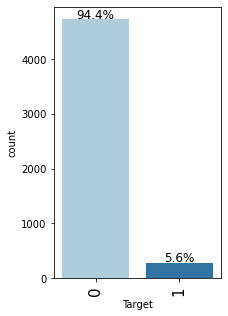

<IPython.core.display.Javascript object>

In [24]:
count_percentage(testdf, "Target")
print("-" * 50)
print("\n")
labeled_barplot(testdf, "Target")

### Notes  

The split between the zeroes and ones in the test data are the same as in the training data -- with the values differing by a tenth.  I call this a rounding effect and not worth worrying about. 

## EDA

### Plotting histograms and boxplots for all the variables at one go

Wall time: 6.4 s


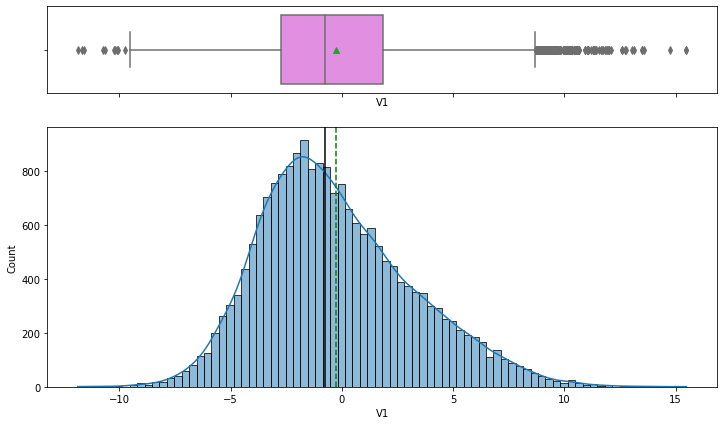

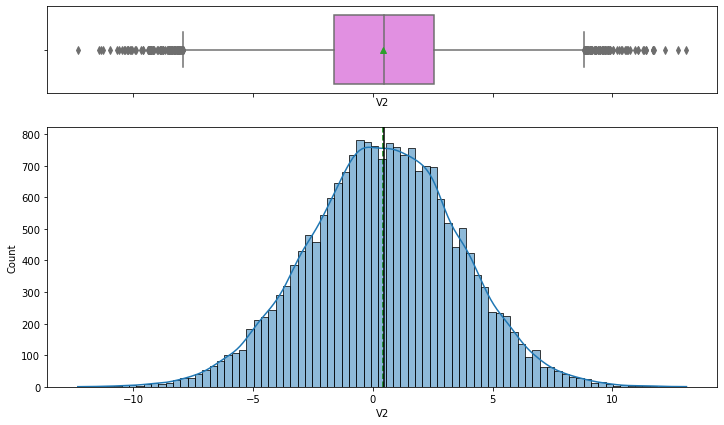

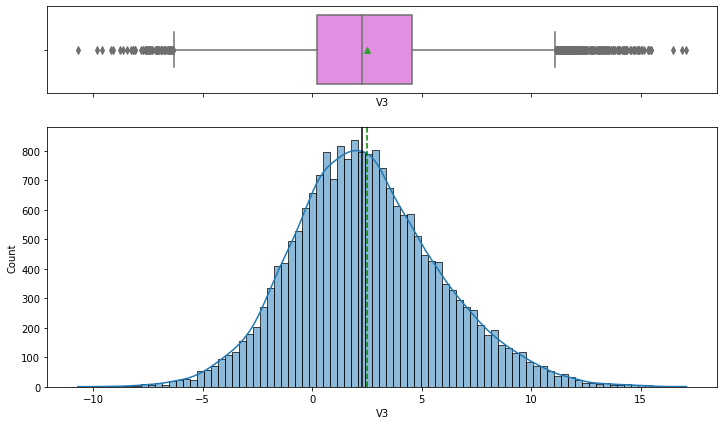

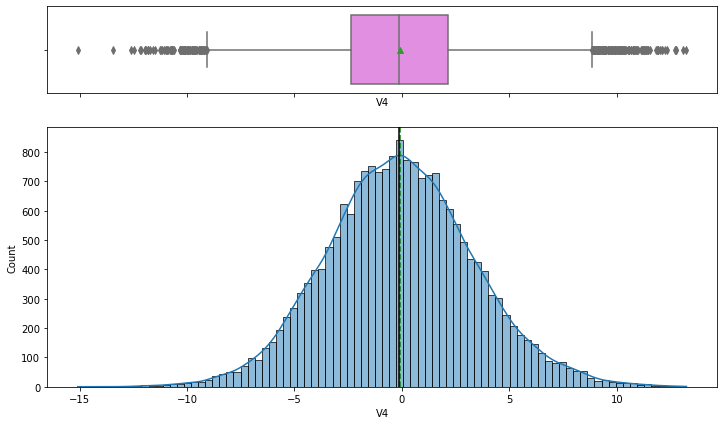

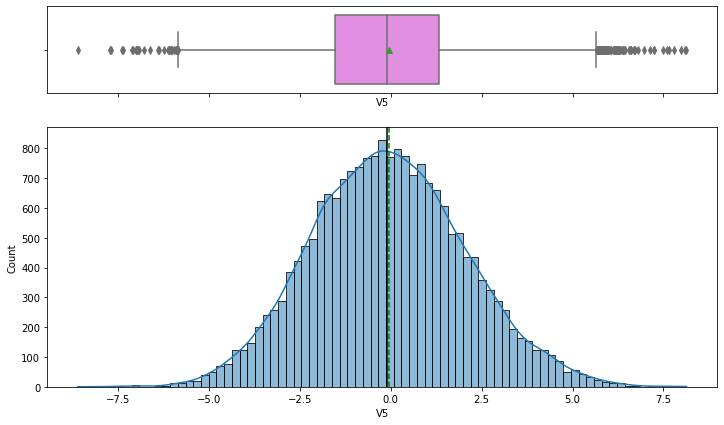

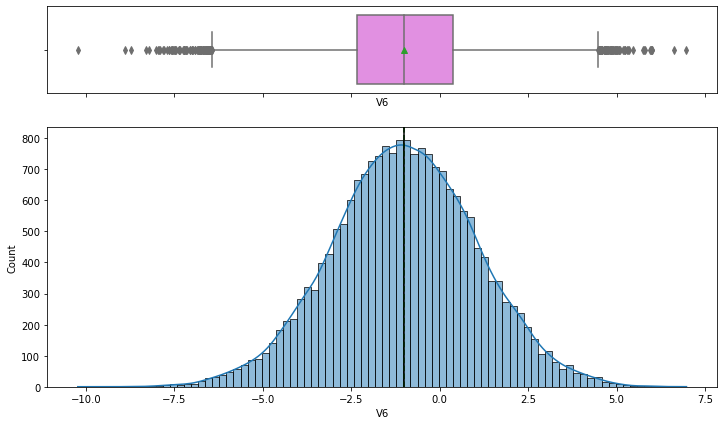

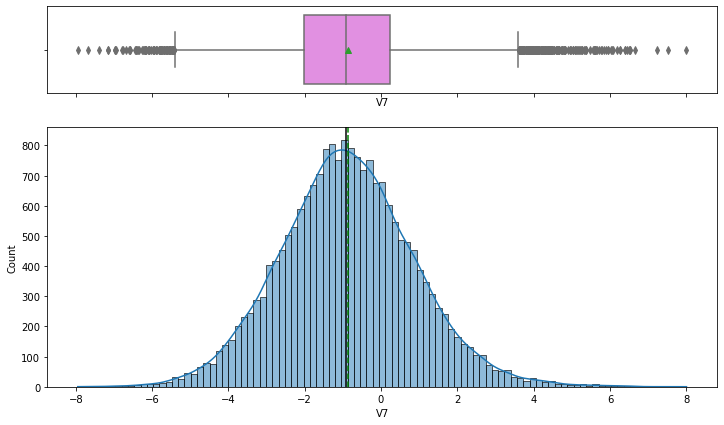

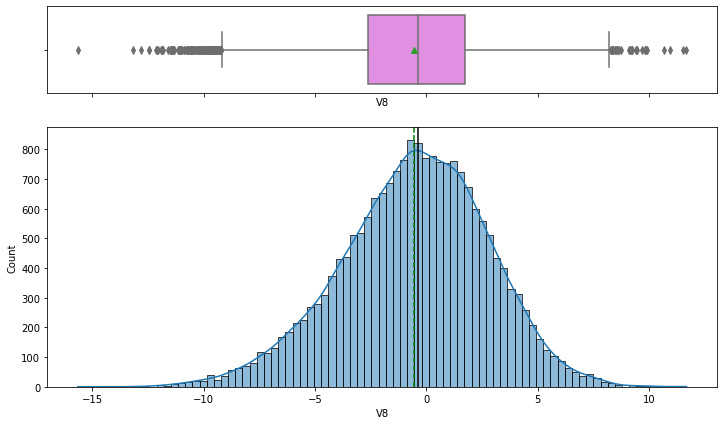

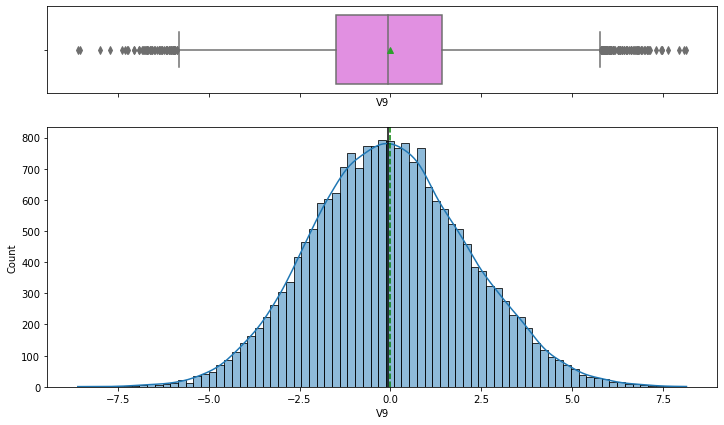

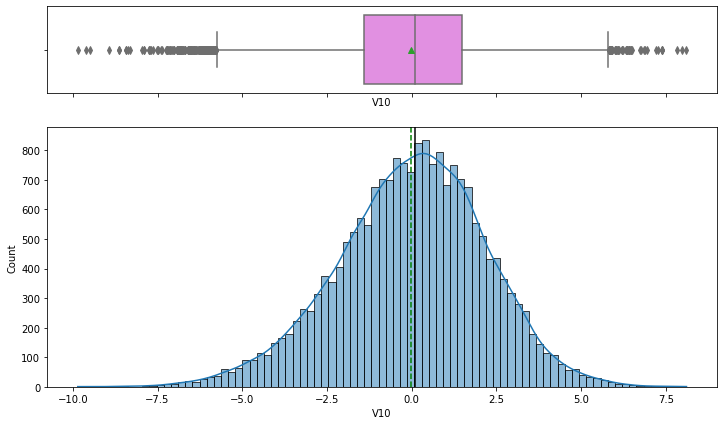

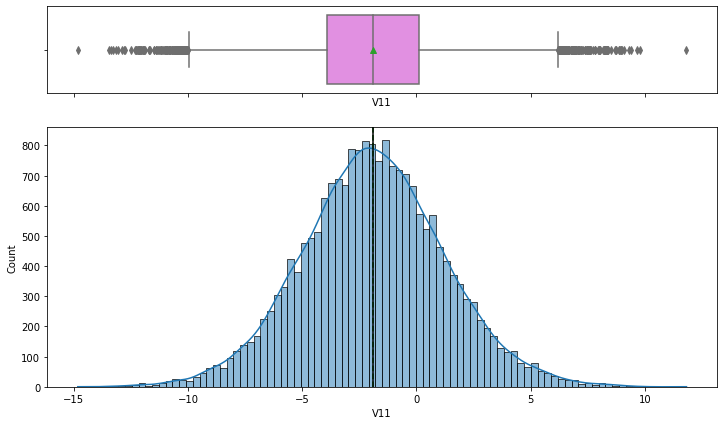

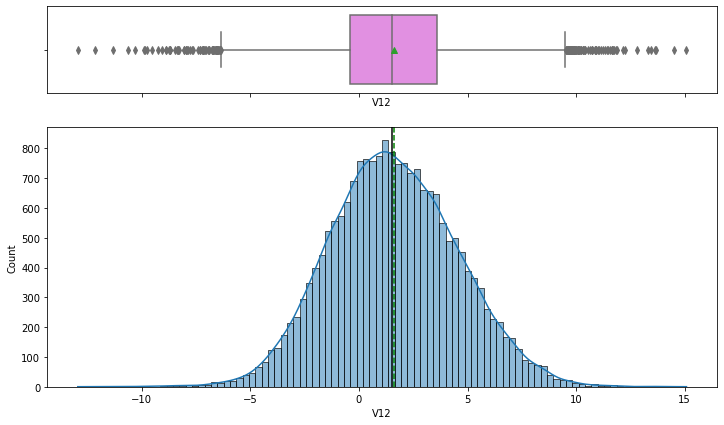

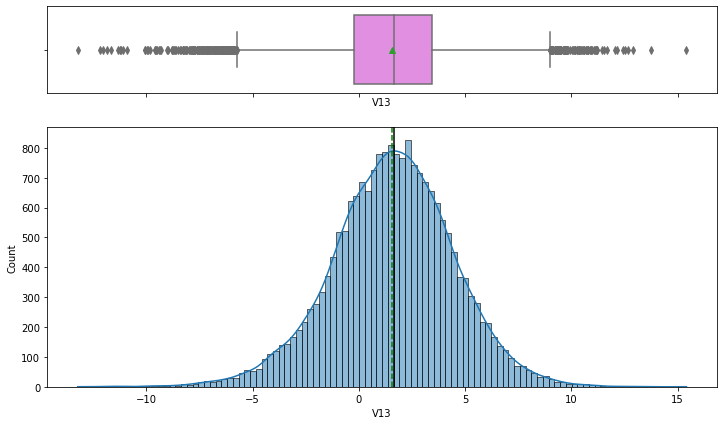

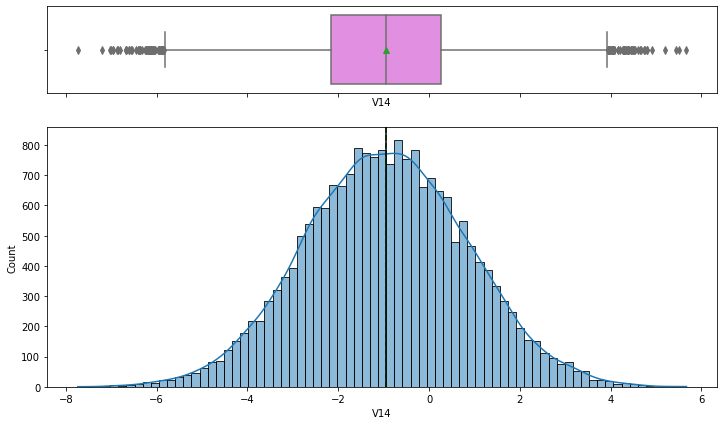

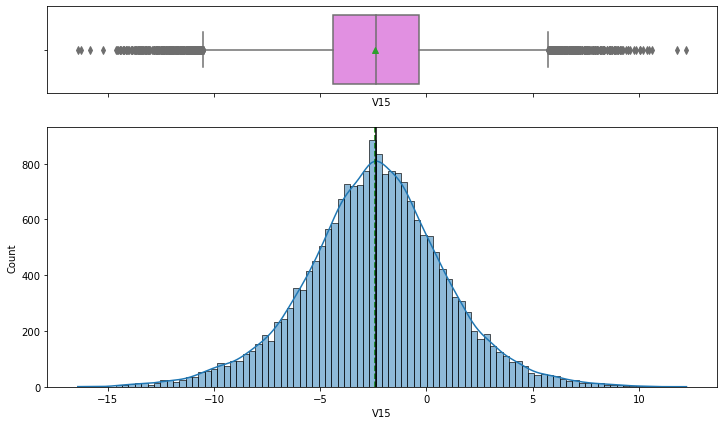

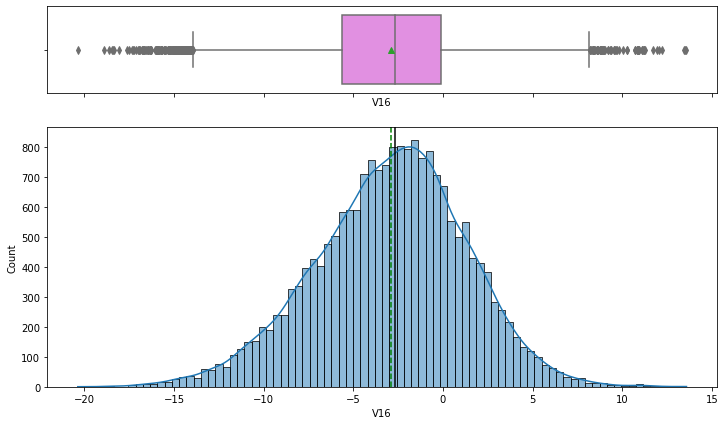

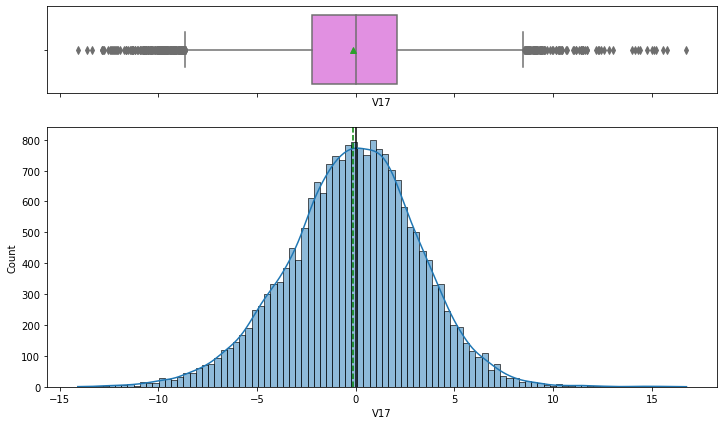

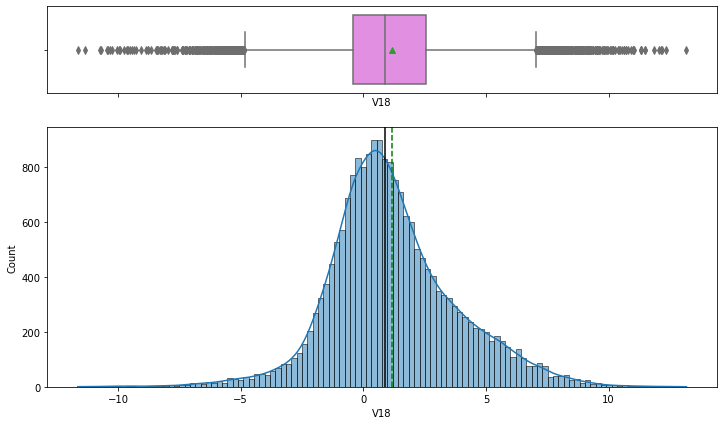

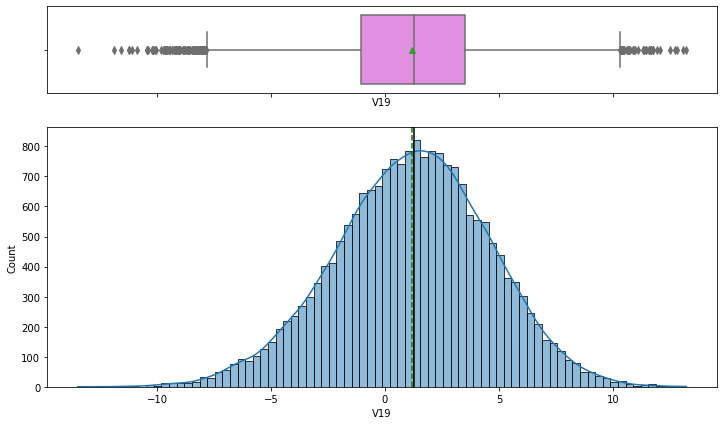

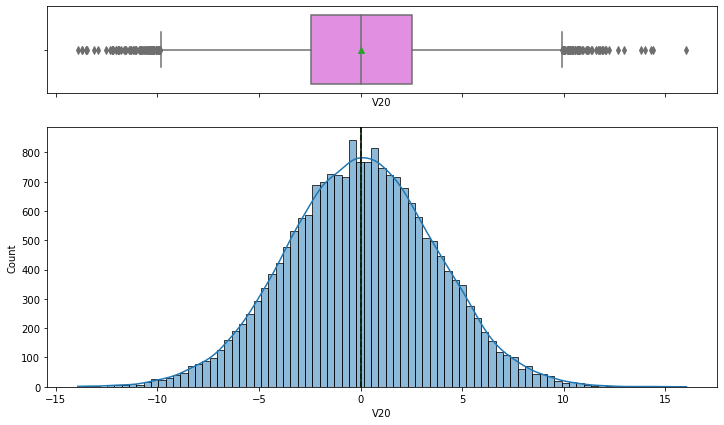

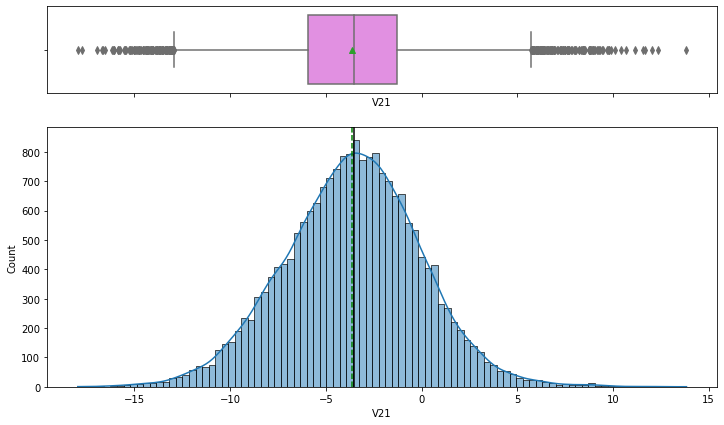

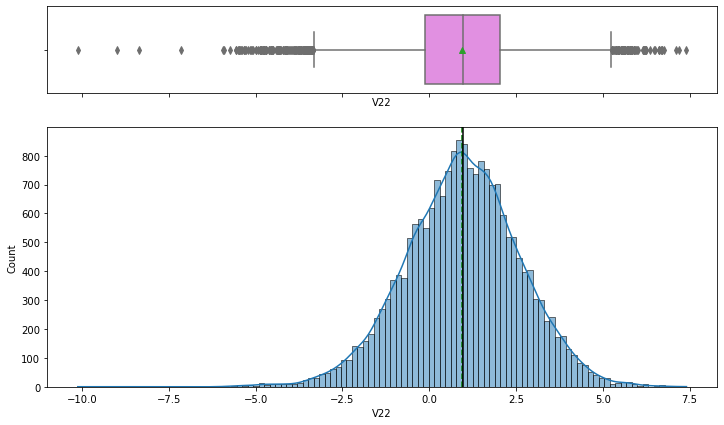

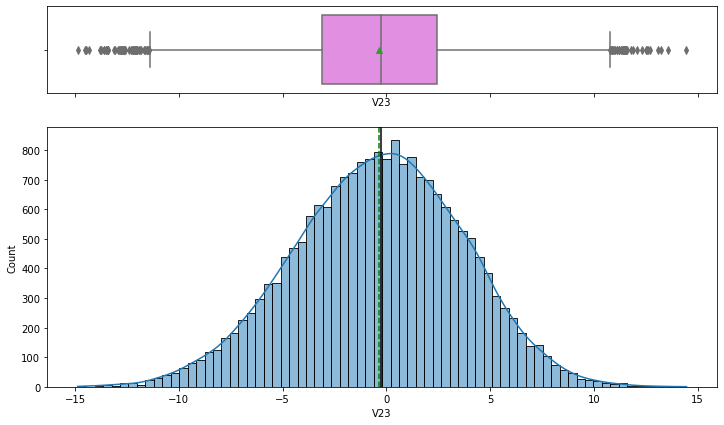

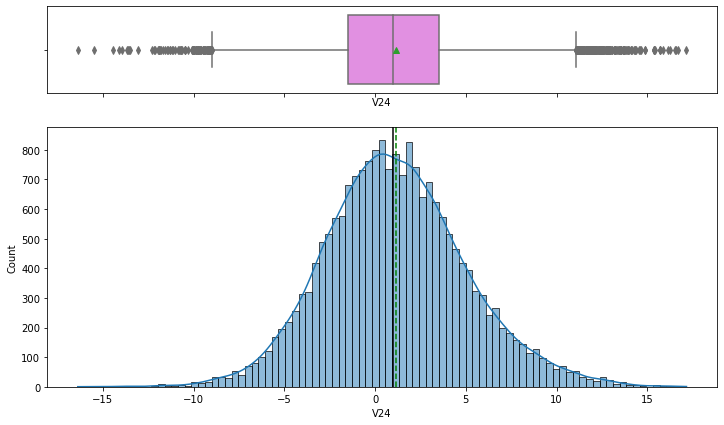

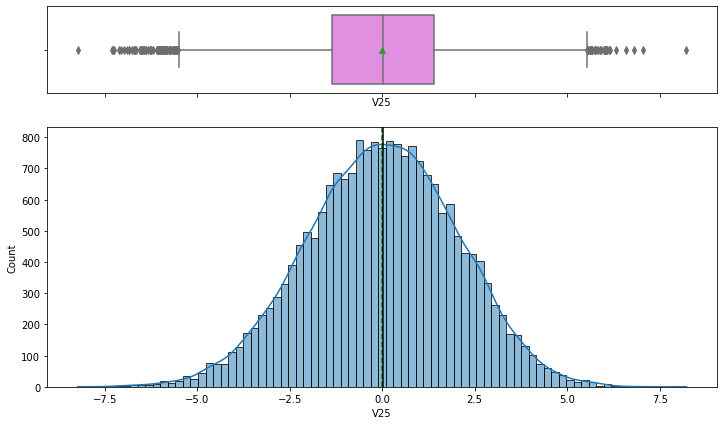

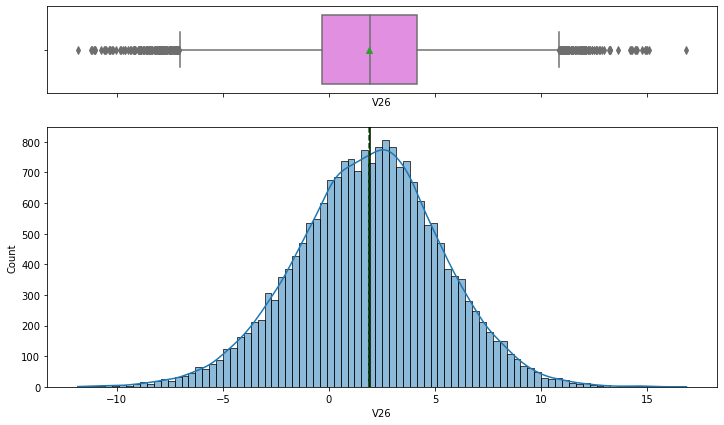

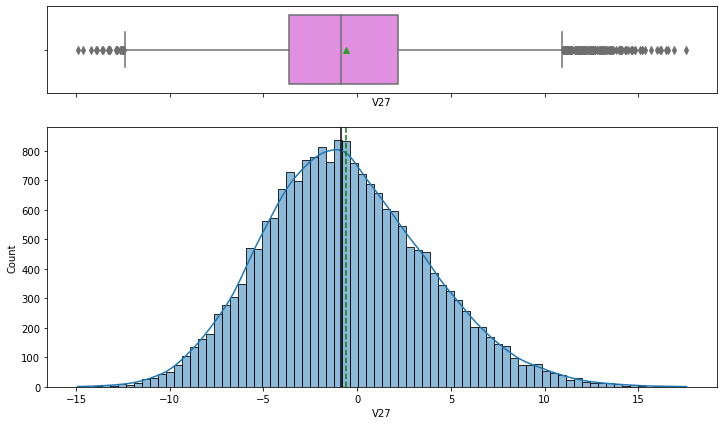

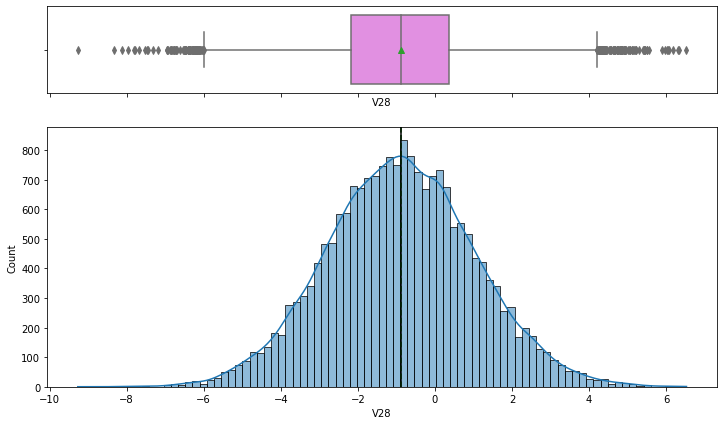

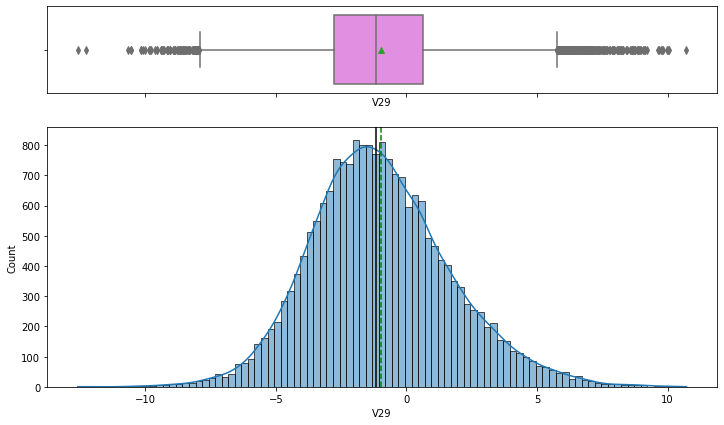

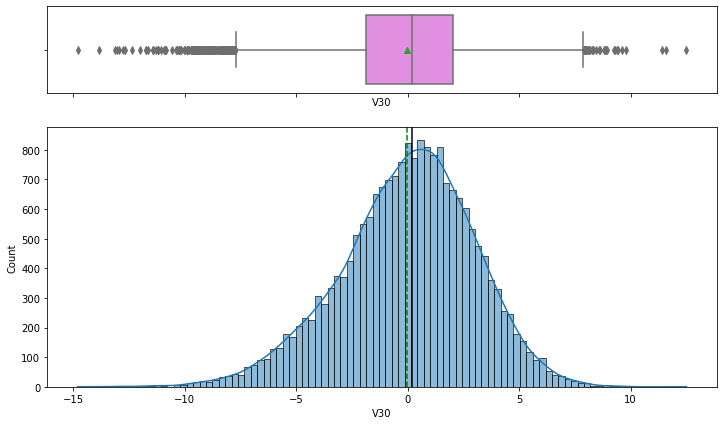

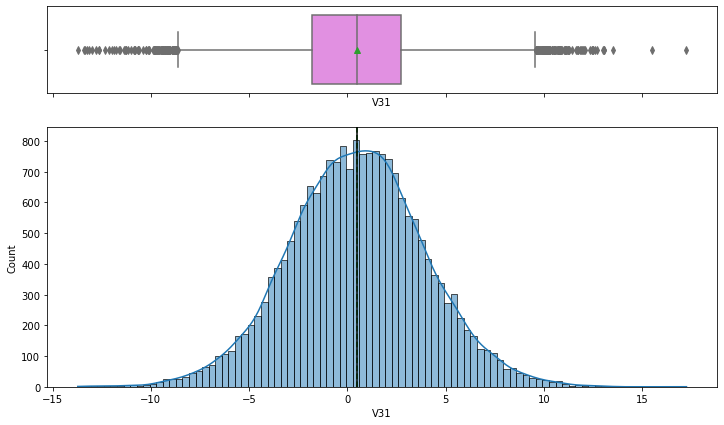

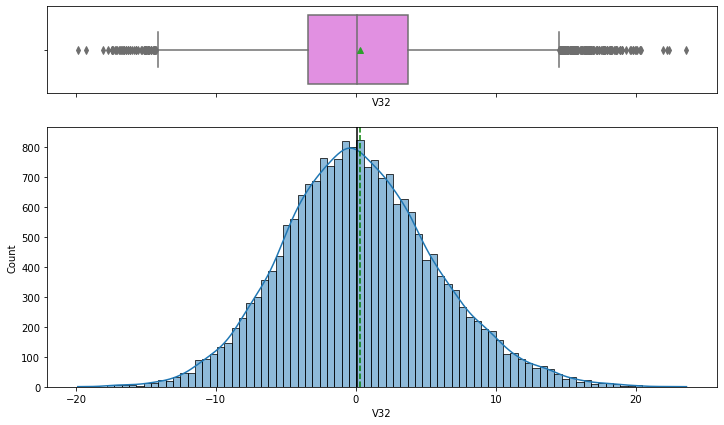

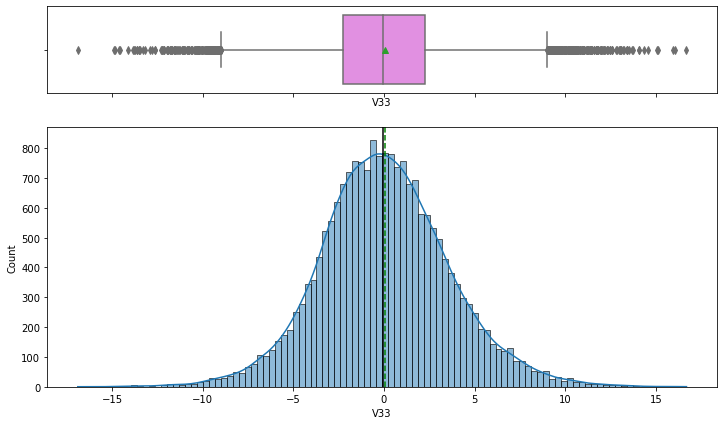

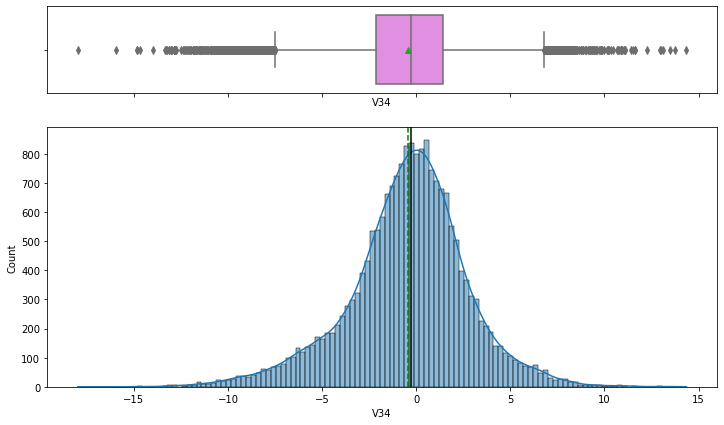

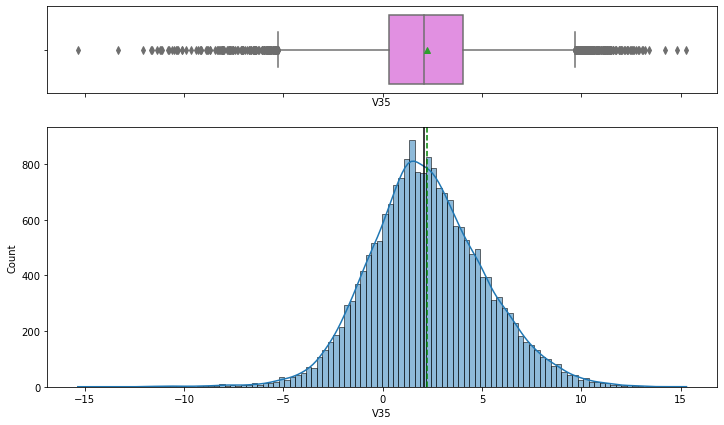

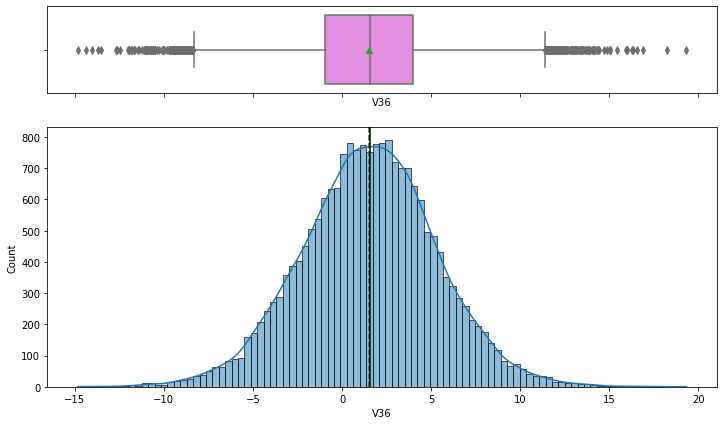

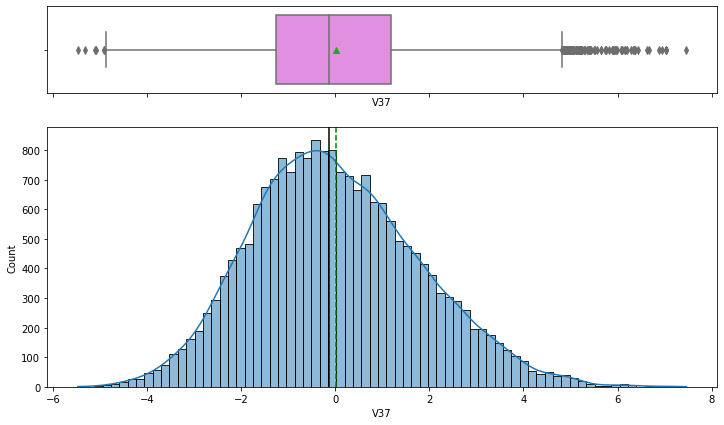

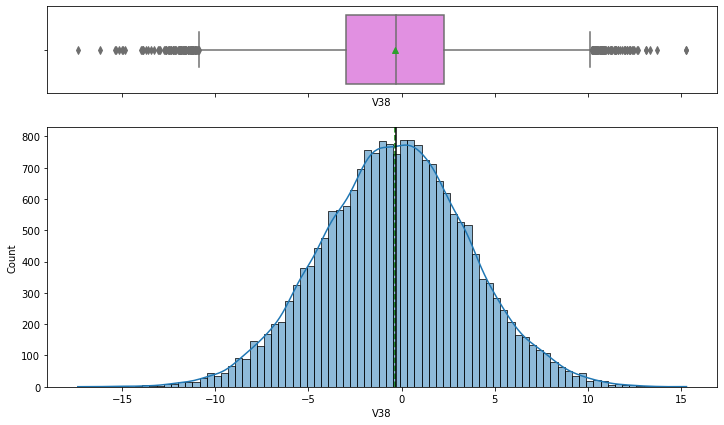

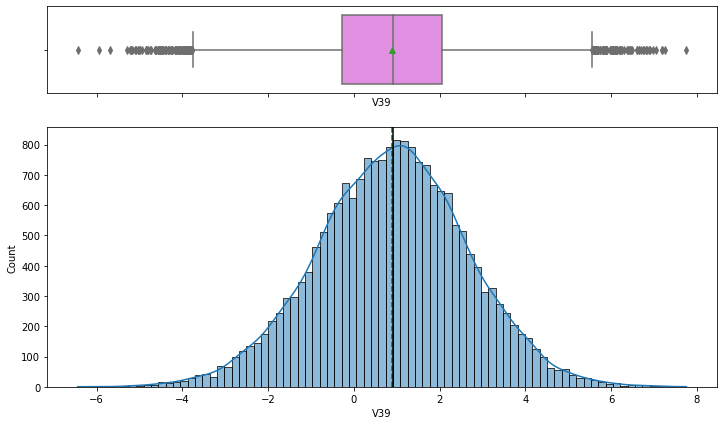

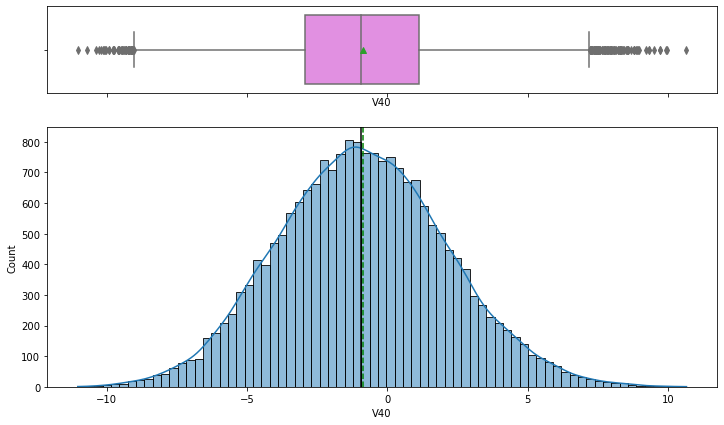

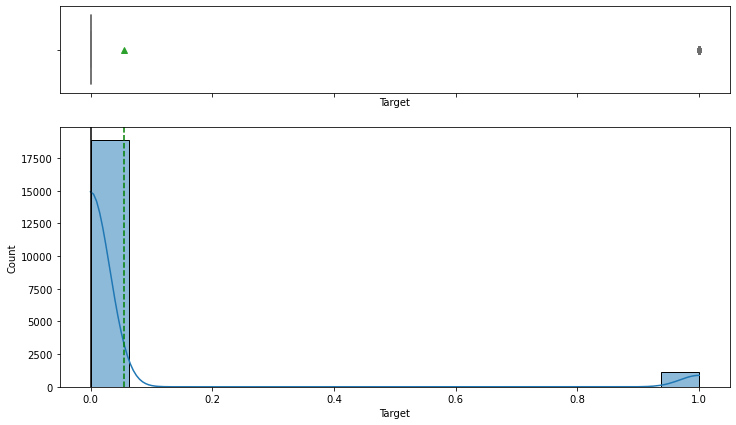

<IPython.core.display.Javascript object>

In [21]:
%%time

for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None) 
    

### Notes

For the most part, all the V predictors are normally distributed.  There are some rather long tails for the V predictors and some have either some right or left skewing, but the skew for all the V predictors is not that pronounced.  There are outliers, but as we know nothing about the V predictors, it is not possible to treat the outliers without negatively affecting the data.  We need to use the data "as-is". 

The Target data is not normally distributed, but its values are either one or zero and as been seen before, there are far more zeroes than ones. 

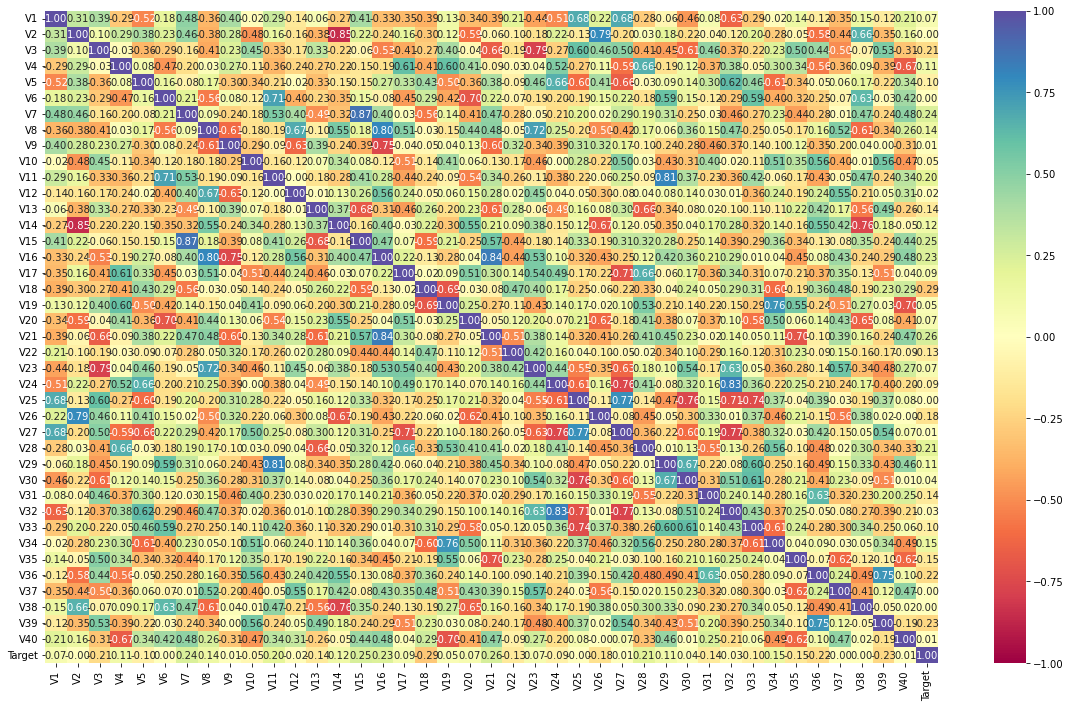

Wall time: 3.3 s


<IPython.core.display.Javascript object>

In [10]:
%%time

plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Notes

The heat map is interesting to see, but we cannot tell much from it since the data is encrypted.  There are some predictors like V2 and V14 that are highly correlated, but without the underlying metadata (description of the data),  there is not much that can be done.  

## Data Pre-processing

In [9]:
# load the DataFrames from disk.
# Optional step -- it just makes it easier to start from here when working on the notebook

df = pd.read_csv(
    "C:/Users/David/LibreOffice_Personal/DataScience/TestData_Files/Train.csv"
)

testdf = pd.read_csv(
    "C:/Users/David/LibreOffice_Personal/DataScience/TestData_Files/Test.csv"
)

<IPython.core.display.Javascript object>

In [10]:
# Independent variables
X = df.drop(["Target"], axis=1)
# Dependent variable
Y = df["Target"]

print("Independent Variables")
print(X.head())
print("\n\nDependent Variable")
print(Y.head())

# Independent variables
X_test = testdf.drop(["Target"], axis=1)
# Dependent variable
Y_test = testdf["Target"]

Independent Variables
      V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0 -4.465 -4.679  3.102  0.506 -0.221 -2.033 -2.911  0.051 -1.522  3.762   
1  3.366  3.653  0.910 -1.368  0.332  2.359  0.733 -4.332  0.566 -0.101   
2 -3.832 -5.824  0.634 -2.419 -1.774  1.017 -2.099 -3.173 -2.082  5.393   
3  1.618  1.888  7.046 -1.147  0.083 -1.530  0.207 -2.494  0.345  2.119   
4 -0.111  3.872 -3.758 -2.983  3.793  0.545  0.205  4.849 -1.855 -6.220   

     V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -5.715  0.736  0.981  1.418 -3.376 -3.047  0.306  2.914  2.270  4.395   
1  1.914 -0.951 -1.255 -2.707  0.193 -4.769 -2.205  0.908  0.757 -5.834   
2 -0.771  1.107  1.144  0.943 -3.164 -4.248 -4.039  3.689  3.311  1.059   
3 -3.053  0.460  2.705 -0.636 -0.454 -3.174 -3.404 -1.282  1.582 -1.952   
4  1.998  4.724  0.709 -1.989 -2.633  4.184  2.245  3.734 -6.313 -5.380   

     V21    V22    V23    V24    V25    V26    V27    V28    V29    V30  \
0

<IPython.core.display.Javascript object>

### Split the independent data 75:25 into train and validation

In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(
    X, Y, test_size=0.25, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [12]:
print(
    "For training data, there are",
    X_train.shape[0],
    "rows and",
    X_train.shape[1],
    "columns.",
)
print(
    "For validation data, there are",
    X_val.shape[0],
    "rows and",
    X_val.shape[1],
    "columns.",
)

print(
    "For test data, there are",
    X_test.shape[0],
    "rows and",
    X_test.shape[1],
    "columns.",
)

print("\n")
print("Percentage of classes in training set:")
print(Y_train.value_counts(normalize=True))
print("\nPercentage of classes in validation set:")
print(Y_val.value_counts(normalize=True))
print("\nPercentage of classes in test set:")
print(Y_test.value_counts(normalize=True))

For training data, there are 15000 rows and 40 columns.
For validation data, there are 5000 rows and 40 columns.
For test data, there are 5000 rows and 40 columns.


Percentage of classes in training set:
0   0.945
1   0.055
Name: Target, dtype: float64

Percentage of classes in validation set:
0   0.944
1   0.056
Name: Target, dtype: float64

Percentage of classes in test set:
0   0.944
1   0.056
Name: Target, dtype: float64


<IPython.core.display.Javascript object>

### Notes 

* The number of columns is the same in the data sets
* The number of rows in the validation and test sets is the same 
* The percentage split for the target class is the same between the training, validation, and test sets   
    * I am not going to worry about the thousandth of a percentage difference between the training and validation/test sets

In [13]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="median")

<IPython.core.display.Javascript object>

In [14]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.fit_transform(X_val), columns=X_val.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)

<IPython.core.display.Javascript object>

In [15]:
print('Number of null values in X train:')
print(X_train.isna().sum())
print("-" * 30)
print('\nNumber of null values in X validation:')
print(X_val.isna().sum())
print("-" * 30)
print('\nNumber of null values in X test:')
print(X_val.isna().sum())


Number of null values in X train:
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------

Number of null values in X validation:
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------

Number of null values in X test:
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10

<IPython.core.display.Javascript object>

### Notes

No more null values in the training, validation, and test sets!  

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [16]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

### Model Building with original data

Sample Decision Tree model building with original data 

In [17]:
# models list will be used in many places so it is defined here 

models = []  # Empty list to store all the models

# Appending models into the list
models.append(('GradBoost', GradientBoostingClassifier(random_state=1)))
models.append(('AdaBoost', AdaBoostClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(('RanForest', RandomForestClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(('XGB', XGBClassifier(random_state=1,eval_metric='logloss')))


<IPython.core.display.Javascript object>

In [18]:
# DataFrame to hold the results of each test
# The Dataframe will be written to disk after each test run so I will be able to pick up the testing
# at any point

results_df = pd.DataFrame(
    columns=[
        "Test",
        "Cross-Validation-Cost",
        "CVModel",
        "CVScore",
        "ValidationPerformance",
        "VALModel",
        "VALPerformance",
    ]
)

# Setting the CVScore and ValPerformance variables to float type 
results_df["CVScore"] = results_df.CVScore.astype("float")
results_df["VALPerformance"] = results_df.VALPerformance.astype("float")
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Test                   0 non-null      object 
 1   Cross-Validation-Cost  0 non-null      object 
 2   CVModel                0 non-null      object 
 3   CVScore                0 non-null      float64
 4   ValidationPerformance  0 non-null      object 
 5   VALModel               0 non-null      object 
 6   VALPerformance         0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 0.0+ bytes


<IPython.core.display.Javascript object>

In [19]:
%%time

# Added code to load the Cross Validation Cost and Validation Performance into separate DataFrames 
# The two frames will be merged later and then loaded into the results dataframe 


results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

temp_cv_df = pd.DataFrame(
    columns=[
        "Test",
        "Cross-Validation-Cost",
        "CVModel",
        "CVScore",
    ]
)

temp_val_df = pd.DataFrame(
    columns=[
        "Test",
        "ValidationPerformance",
        "VALModel",
        "VALPerformance",
    ]
)

test = 'Model Building with original data'
cvcost = "Cross-Validation Cost"
valperf = "Validation Performance"


# loop through all models to get the mean cross validated score
print(color.BOLD + 'Model Building with original data' + color.END)
print(color.BOLD + "\n" "Cross-Validation Cost:" "\n" + color.END)

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=Y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))
    to_append = [test, cvcost, name, cv_result.mean()]
    df_length = len(temp_cv_df)
    temp_cv_df.loc[len(temp_cv_df)] = to_append


print(color.BOLD + "\n" "Validation Performance:" "\n" + color.END)

for name, model in models:
    model.fit(X_train, Y_train)
    scores = recall_score(Y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))
    to_append = [test, valperf, name, scores]
    temp_val_df.loc[len(temp_val_df)] = to_append

print('\n')     # for formatting.  Add a line between the last result and the wall time

Model Building with original data

Cross-Validation Cost:

GradBoost: 0.7066661857008874
AdaBoost: 0.6309140754635308
Bagging: 0.7210807301060529
RanForest: 0.7235192266070268
dtree: 0.6982829521679532
Logistic Regression: 0.4927566553639709
XGB: 0.7956208065796118

Validation Performance:

GradBoost: 0.7230215827338129
AdaBoost: 0.6762589928057554
Bagging: 0.7302158273381295
RanForest: 0.7266187050359713
dtree: 0.7050359712230215
Logistic Regression: 0.48201438848920863
XGB: 0.8201438848920863


Wall time: 2min 58s


<IPython.core.display.Javascript object>

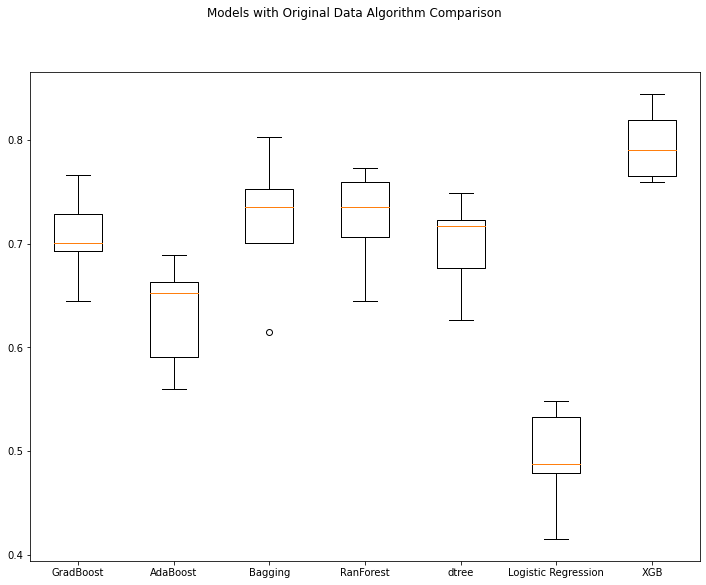

<IPython.core.display.Javascript object>

In [20]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(12, 9))

fig.suptitle("Models with Original Data Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Notes  

The models performed well except for Logistic Regression.  It scored way below the other models. 
</br>
XGB performed much better than the other models. 
</br> 
All the other models were, in general, similar to each other. 

In [21]:
# Merge the cross validation cost and validation performance results 
# Append results into results DataFrame 

templen = len(temp_cv_df)
for i in range(templen):
    to_append = []
    to_append = temp_cv_df.iloc[i, 0:]
    to_append = to_append.append(temp_val_df.iloc[i, 1:])
    results_df.loc[len(results_df)] = to_append

<IPython.core.display.Javascript object>

In [22]:
# Make backup copy of results DataFrame to disk!

results_df.to_csv("C:/Users/David/temp/MT_Project/results_df.csv", index=False)

# results_df = pd.read_csv("C:/Users/David/temp/MT_Project/results_df.csv")

<IPython.core.display.Javascript object>

### Model Building with Oversampled data


In [23]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

Before OverSampling, counts of label '1': 832
Before OverSampling, counts of label '0': 14168 



<IPython.core.display.Javascript object>

In [24]:
%%time

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, Y_train_over = sm.fit_resample(X_train, Y_train)

Wall time: 64.9 ms


<IPython.core.display.Javascript object>

In [25]:
print("After OverSampling, the shape of X_train: {}".format(X_train_over.shape))
print("After OverSampling, the shape of Y_train: {} \n".format(Y_train_over.shape))

After OverSampling, the shape of X_train: (28336, 40)
After OverSampling, the shape of Y_train: (28336,) 



<IPython.core.display.Javascript object>

### Notes

The training data sets now have the same number of rows. 

In [26]:
%%time

# Added code to load the Cross Validation Cost and Validation Performance into separate DataFrames 
# The two frames will be merged later and then loaded into the results dataframe 


results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

temp_cv_df = pd.DataFrame(
    columns=[
        "Test",
        "Cross-Validation-Cost",
        "CVModel",
        "CVScore",
    ]
)

temp_val_df = pd.DataFrame(
    columns=[
        "Test",
        "ValidationPerformance",
        "VALModel",
        "VALPerformance",
    ]
)

test = 'Model Building with OverSampling data'
cvcost = "Cross-Validation Cost"
valperf = "Validation Performance"


# loop through all models to get the mean cross validated score
print(color.BOLD + 'Model Building with OverSampling data' + color.END)
print(color.BOLD + "\n" "Cross-Validation Cost:" "\n" + color.END)

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=Y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))
    to_append = [test, cvcost, name, cv_result.mean()]
    temp_cv_df.loc[len(temp_cv_df)] = to_append


print(color.BOLD + "\n" "Validation Performance:" "\n" + color.END)

for name, model in models:
    model.fit(X_train_over, Y_train_over)
    scores = recall_score(Y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))
    to_append = [test, valperf, name, scores]
    temp_val_df.loc[len(temp_val_df)] = to_append

print('\n')     # for formatting.  Add a line between the last result and the wall time

Model Building with OverSampling data

Cross-Validation Cost:

GradBoost: 0.9256068151319724
AdaBoost: 0.8978689011775473
Bagging: 0.9762141471581656
RanForest: 0.9839075260047615
dtree: 0.9720494245534969
Logistic Regression: 0.883963699328486
XGB: 0.989554053559209

Validation Performance:

GradBoost: 0.8776978417266187
AdaBoost: 0.8561151079136691
Bagging: 0.8345323741007195
RanForest: 0.8489208633093526
dtree: 0.7769784172661871
Logistic Regression: 0.8489208633093526
XGB: 0.8669064748201439


Wall time: 5min 5s


<IPython.core.display.Javascript object>

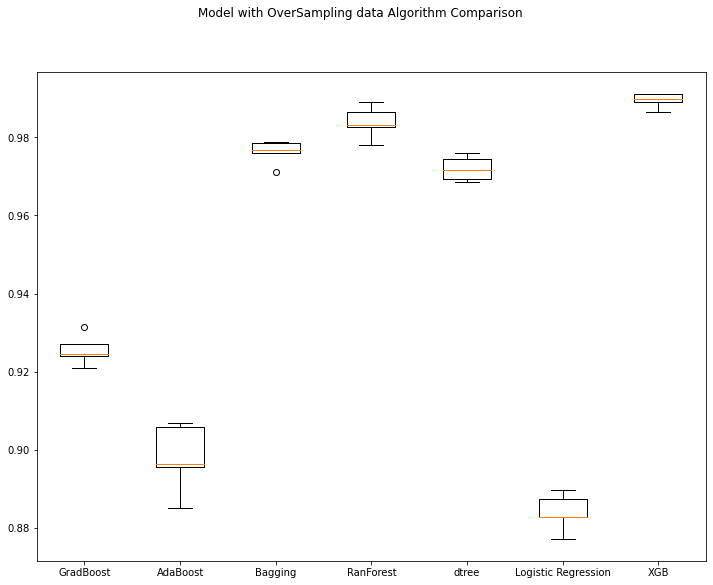

<IPython.core.display.Javascript object>

In [27]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(12, 9))

fig.suptitle("Model with OverSampling data Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Notes

* With scores of 92% or better for most of the models, this points to overfitting 
    * Bagging, Random Forest, Decision Tree, and XGB are almost certainly overfitting 
* AdaBoost and Logistic Regression are the lowest
    * Hard to say if they are overfitting 
    
Not certain if this is the best model 

In [28]:
# Merge the cross validation cost and validation performance results
# Append results into results DataFrame

templen = len(temp_cv_df)
for i in range(templen):
    to_append = []
    to_append = temp_cv_df.iloc[i, 0:]
    to_append = to_append.append(temp_val_df.iloc[i, 1:])
    results_df.loc[len(results_df)] = to_append

<IPython.core.display.Javascript object>

In [29]:
# Make backup copy of results DataFrame to disk!

results_df.to_csv("C:/Users/David/temp/MT_Project/results_df.csv", index=False)

# results_df = pd.read_csv("C:/Users/David/temp/MT_Project/results_df.csv")

<IPython.core.display.Javascript object>

### Model Building with Undersampled data

In [30]:
print("Before UnderSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

Before UnderSampling, counts of label '1': 832
Before UnderSampling, counts of label '0': 14168 



<IPython.core.display.Javascript object>

In [31]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, Y_train_un = rus.fit_resample(X_train, Y_train)

<IPython.core.display.Javascript object>

In [32]:
print("After UnderSampling, the shape of X_train: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of Y_train: {} \n".format(Y_train_un.shape))

After UnderSampling, the shape of X_train: (1664, 40)
After UnderSampling, the shape of Y_train: (1664,) 



<IPython.core.display.Javascript object>

### Notes

The models now have the same number of rows but greatly reduced from the maximum number of rows in X_train.

In [33]:
%%time

# Added code to load the Cross Validation Cost and Validation Performance into separate DataFrames 
# The two frames will be merged later and then loaded into the results dataframe 


results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

temp_cv_df = pd.DataFrame(
    columns=[
        "Test",
        "Cross-Validation-Cost",
        "CVModel",
        "CVScore",
    ]
)

temp_val_df = pd.DataFrame(
    columns=[
        "Test",
        "ValidationPerformance",
        "VALModel",
        "VALPerformance",
    ]
)

test = 'Model Building with UnderSampling data'
cvcost = "Cross-Validation Cost"
valperf = "Validation Performance"


# loop through all models to get the mean cross validated score
print(color.BOLD + 'Model Building with UnderSampling data' + color.END)
print(color.BOLD + "\n" "Cross-Validation Cost:" "\n" + color.END)

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=Y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))
    to_append = [test, cvcost, name, cv_result.mean()]
    df_length = len(temp_cv_df)
    temp_cv_df.loc[len(temp_cv_df)] = to_append


print(color.BOLD + "\n" "Validation Performance:" "\n" + color.END)

for name, model in models:
    model.fit(X_train_un, Y_train_un)
    scores = recall_score(Y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))
    to_append = [test, valperf, name, scores]
    temp_val_df.loc[len(temp_val_df)] = to_append

print('\n')     # for formatting.  Add a line between the last result and the wall time

Model Building with UnderSampling data

Cross-Validation Cost:

GradBoost: 0.8978572974532861
AdaBoost: 0.8666113556020489
Bagging: 0.8641945025611427
RanForest: 0.9038669648654498
dtree: 0.8617776495202367
Logistic Regression: 0.8726138085275232
XGB: 0.9074742082100858

Validation Performance:

GradBoost: 0.8884892086330936
AdaBoost: 0.8489208633093526
Bagging: 0.8705035971223022
RanForest: 0.8920863309352518
dtree: 0.841726618705036
Logistic Regression: 0.8525179856115108
XGB: 0.9028776978417267


Wall time: 13.7 s


<IPython.core.display.Javascript object>

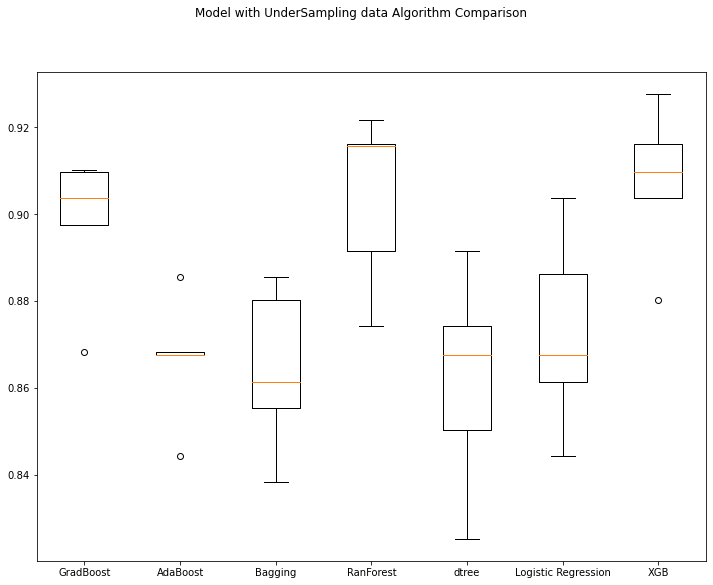

<IPython.core.display.Javascript object>

In [34]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(12, 9))

fig.suptitle("Model with UnderSampling data Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Notes

* Gradient Boosting, Random Forest, and XGB have medians that are close to each other 
    * The medians are above 90% so there could be some overfitting 
* AdaBoost, Bagging, Decision Tree, and Logistic Regression have similar medians 
    * At approximately 87%, there does not appear to be overfitting in these models 
* Under fitting might be good strategy to follow

In [35]:
# Merge the cross validation cost and validation performance results 
# Append results into results DataFrame 

templen = len(temp_cv_df)
for i in range(templen):
    to_append = []
    to_append = temp_cv_df.iloc[i, 0:]
    to_append = to_append.append(temp_val_df.iloc[i, 1:])
    results_df.loc[len(results_df)] = to_append


<IPython.core.display.Javascript object>

In [36]:
# Make backup copy of results DataFrame to disk!

results_df.to_csv("C:/Users/David/temp/MT_Project/results_df.csv", index=False)

# results_df = pd.read_csv("C:/Users/David/temp/MT_Project/results_df.csv")

<IPython.core.display.Javascript object>

## The First Cut 

There are 21 contenders vying to get to the next round for hyperparameter tuning.  Only 5 can make it to the next round.  The criteria for advancing is: 
* The cross validation cost or the validation performance result must be above 0.80 
    * If either number is below 0.80, then the model does not advance 
* Will select the model within the model type the least difference between cross validation cost and validation performance results

"Model type" is AdaBoost, XGBoost, Random Forest, etc. 

0.80 was chosen as when reviewing the results, it was a natural cut point.  There are many results above 0.80 and many below the number. 

The final cut will be the models with the least difference between the Cross Validation Score and the Validation Score.  As the Cross Validation Score was generated on the training data and the validation score was generated on the validation data, the models with the least difference between these two numbers should work the best on the test data and generalize well.  


In [8]:
# load results DataFrame

results_df = pd.read_csv("C:/Users/David/temp/MT_Project/results_df.csv")

<IPython.core.display.Javascript object>

In [37]:
conten_df = results_df[results_df["CVScore"] > 0.80]
conten_df = conten_df[conten_df["VALPerformance"] > 0.80]

conten_df["scorediff"] = conten_df["CVScore"] - conten_df["VALPerformance"]

conten_df.sort_values(by=["CVModel"], inplace=True, ascending=False)

print(color.BOLD + 'The contenders are:' + color.END)
conten_df


The contenders are:


,Test,Cross-Validation-Cost,CVModel,CVScore,ValidationPerformance,VALModel,VALPerformance,scorediff
18,Model Building with UnderSampling data,Cross-Validation Cost,dtree,0.862,Validation Performance,dtree,0.842,0.020
13,Model Building with OverSampling data,Cross-Validation Cost,XGB,0.990,Validation Performance,XGB,0.867,0.123
20,Model Building with UnderSampling data,Cross-Validation Cost,XGB,0.907,Validation Performance,XGB,0.903,0.005
10,Model Building with OverSampling data,Cross-Validation Cost,RanForest,0.984,Validation Performance,RanForest,0.849,0.135
17,Model Building with UnderSampling data,Cross-Validation Cost,RanForest,0.904,Validation Performance,RanForest,0.892,0.012
12,Model Building with OverSampling data,Cross-Validation Cost,Logistic Regression,0.884,Validation Performance,Logistic Regression,0.849,0.035
19,Model Building with UnderSampling data,Cross-Validation Cost,Logistic Regression,0.873,Validation Performance,Logistic Regression,0.853,0.020
7,Model Building with OverSampling data,Cross-Validation Cost,GradBoost,0.926,Validation Performance,GradBoost,0.878,0.048
14,Model Building with UnderSampling data,Cross-Validation Cost,GradBoost,0.898,Validation Performance,GradBoost,0.888,0.009
9,Model Building with OverSampling data,Cross-Validation Cost,Bagging,0.976,Validation Performance,Bagging,0.835,0.142


<IPython.core.display.Javascript object>

## The Finalists Are: 
* GradBoost Model Building with Under Sampling data
* AdaBoost Model Building with Over Sampling data
* Bagging Model Building with Over Sampling data
* RanForest Model Building with Under Sampling data
* XGB Model Building with Under Sampling data



### Reasons: 
* GradBoost Model Building with Under Sampling data
    * Gradient Model with over sampling has a CV Score that I think is too high 
    * The difference between the CV Score and VAL Performance is also very low for under sampling 
    * If this model works well with the validation data, it should work well with the test data 
* AdaBoost Model Building with Over Sampling data
    * Better performance for both the training and validation data sets with over sampling as compared to under sampling 
    * The CV Score is not too high to worry about over fitting 
* Bagging Model Building with Over Sampling data
    * Good performance and scores for the CV Score and validation data 
    * The CV Score is high so there could be some over fitting 
        * This might be something to watch 
* RanForest Model Building with Under Sampling data
    * High scores for both CV Score and VAL Performance 
        * But not too high 
    * Small difference between CV Score and VAL Performance 
* XGB Model Building with Under Sampling data
    * High scores for both CV Score and VAL Performance 
    * Small difference between CV Score and VAL Performance 
    * The results for the over sampling were too high in my opinion 

## HyperparameterTuning 

### Sample Parameter Grids


- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

## RandomizedSearchCV Tests

### Gradient Boost Model Building with Under Sampling data

In [9]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = param_grid = { "n_estimators": np.arange(100,150,25), 
                           "learning_rate": [0.2, 0.05, 1], 
                           "subsample":[0.5,0.7], 
                           "max_features":[0.5,0.7] }
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10,
                                   n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,Y_train_un)

print("Best parameters are {} \n with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

print('\n')   # formatting for wall time

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} 
 with CV score=0.9050212827357333:


Wall time: 6.89 s


<IPython.core.display.Javascript object>

In [10]:
%%time 

GB_tuned = GradientBoostingClassifier(random_state=1, subsample=0.7, n_estimators=125, 
                                       max_features=0.5, learning_rate=0.2)
GB_tuned.fit(X_train, Y_train)

Wall time: 6.74 s


GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.7)

<IPython.core.display.Javascript object>

In [11]:
GB_train = model_performance_classification_sklearn(GB_tuned, X_train, Y_train)
print("Training performance:")
print(GB_train.T)

GB_val = model_performance_classification_sklearn(GB_tuned, X_val, Y_val)
print("Validation performance:")
GB_val.T

Training performance:
              0
Accuracy  0.994
Recall    0.915
Precision 0.981
F1        0.947
Validation performance:


,0
Accuracy,0.981
Recall,0.766
Precision,0.873
F1,0.816


<IPython.core.display.Javascript object>

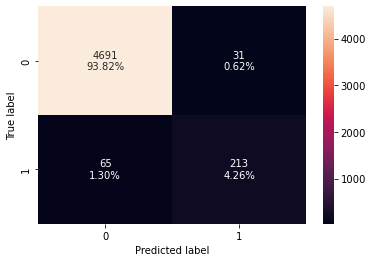

<IPython.core.display.Javascript object>

In [12]:
# creating confusion matrix

confusion_matrix_sklearn(GB_tuned, X_val, Y_val)

### Notes 

* Large difference between the training recall and validation recall
* Precision is also lower between training and validation 
* Could be a workable model, but need to test the others 

### AdaBoost Model Building with Over Sampling data

In [9]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [100, 150, 200], 
              "learning_rate": [0.2, 0.05], 
              "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), 
                                 DecisionTreeClassifier(max_depth=2, random_state=1), 
                                 DecisionTreeClassifier(max_depth=3, random_state=1), ] }
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10,
                                   n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,Y_train_over)

print("Best parameters are {} \n with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

print('\n')   # formatting for wall time

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} 
 with CV score=0.9715559462639259:


Wall time: 3min 59s


<IPython.core.display.Javascript object>

In [10]:
%%time 

Ada_tuned = AdaBoostClassifier(random_state=1, n_estimators=200, learning_rate=0.2, 
                               base_estimator = DecisionTreeClassifier(max_depth=3, random_state=1))
Ada_tuned.fit(X_train, Y_train)

Wall time: 34.3 s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200, random_state=1)

<IPython.core.display.Javascript object>

In [20]:
Ada_train = model_performance_classification_sklearn(Ada_tuned, X_train, Y_train)
print("Training performance:")
print(Ada_train.T)

Ada_val = model_performance_classification_sklearn(Ada_tuned, X_val, Y_val)
print("Validation performance:")
Ada_val.T

Training performance:
              0
Accuracy  0.999
Recall    0.984
Precision 1.000
F1        0.992
Validation performance:


,0
Accuracy,0.986
Recall,0.766
Precision,0.977
F1,0.859


<IPython.core.display.Javascript object>

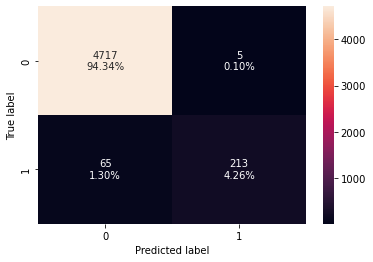

<IPython.core.display.Javascript object>

In [21]:
# creating confusion matrix

confusion_matrix_sklearn(Ada_tuned, X_val, Y_val)

### Notes

* Large difference between the training recall and validation recall
* Training recall is also high -- could be over fitting 
* Precision is also lower between training and validation 
* Could be a workable model, but need to test the others 

### Bagging Model Building with Over Sampling data

In [18]:
%%time

# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9], 
              'n_estimators' : [30,50,70], }
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10,
                                   n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,Y_train_over)

print("Best parameters are {} \n with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

print('\n')   # formatting for wall time

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.8} 
 with CV score=0.9828488269988673:


Wall time: 3min 5s


<IPython.core.display.Javascript object>

In [19]:
%%time 

Bag_tuned = BaggingClassifier(random_state=1, n_estimators=70, max_samples=0.9, max_features=0.8)
Bag_tuned.fit(X_train, Y_train)

Wall time: 34.1 s


BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=70,
                  random_state=1)

<IPython.core.display.Javascript object>

In [20]:
Bag_train = model_performance_classification_sklearn(Bag_tuned, X_train, Y_train)
print("Training performance:")
print(Bag_train.T)

Bag_val = model_performance_classification_sklearn(Bag_tuned, X_val, Y_val)
print("Validation performance:")
Bag_val.T

Training performance:
              0
Accuracy  1.000
Recall    0.994
Precision 1.000
F1        0.997
Validation performance:


,0
Accuracy,0.984
Recall,0.741
Precision,0.972
F1,0.841


<IPython.core.display.Javascript object>

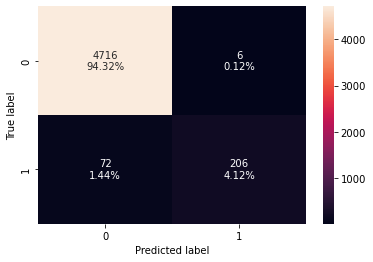

<IPython.core.display.Javascript object>

In [21]:
# creating confusion matrix

confusion_matrix_sklearn(Bag_tuned, X_val, Y_val)

### Notes 

* Accuracy and Precision are both 100% in training -- very good chance of over fitting 
* Accuracy and Precision are also high for the validation data 
* Large difference between the training recall and validation recall
* Cells also had a long run time, so model might be over built 
* Not so certain this is a good model 

### Random Forest Model Building with Under Sampling data

In [22]:
%%time

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [200,250,300], 
              "min_samples_leaf": np.arange(1, 4), 
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], 
              "max_samples": np.arange(0.4, 0.7, 0.1) }

randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10,
                                   n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,Y_train_un)

print("Best parameters are {} \n with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

print('\n')   # formatting for wall time

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} 
 with CV score=0.8978140105331505:


Wall time: 4.32 s


<IPython.core.display.Javascript object>

In [23]:
%%time 

Ran_tuned = RandomForestClassifier(random_state=1,n_estimators=300, min_samples_leaf=1, max_samples=0.6, 
                                   max_features='sqrt')

Ran_tuned.fit(X_train, Y_train)

Wall time: 17 s


RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=300,
                       random_state=1)

<IPython.core.display.Javascript object>

In [24]:
Ran_train = model_performance_classification_sklearn(Ran_tuned, X_train, Y_train)
print("Training performance:")
print(Ran_train.T)

Ran_val = model_performance_classification_sklearn(Ran_tuned, X_val, Y_val)
print("Validation performance:")
Ran_val.T

Training performance:
              0
Accuracy  0.995
Recall    0.912
Precision 1.000
F1        0.954
Validation performance:


,0
Accuracy,0.983
Recall,0.712
Precision,0.985
F1,0.827


<IPython.core.display.Javascript object>

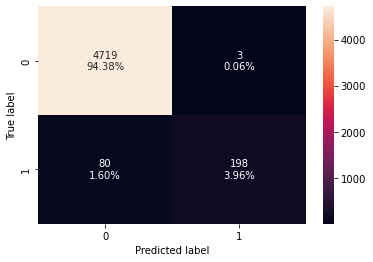

<IPython.core.display.Javascript object>

In [25]:
# creating confusion matrix

confusion_matrix_sklearn(Ran_tuned, X_val, Y_val)

### Notes

* Large difference between the training recall and validation recall
* Accuracy and Precision are above 98.3% for both training and validation 
    * Points to overfitting 
* Not certain this is a good model 

### XGB Model Building with Under Sampling data

In [26]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomSearchCV
param_grid={ 'n_estimators': [150, 200, 250], 
            'scale_pos_weight': [5,10], 
            'learning_rate': [0.1,0.2], 
            'gamma': [0,3,5], 
            'subsample': [0.8,0.9] }

randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10,
                                   n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,Y_train_un)

print("Best parameters are {} \n with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

print('\n')   # formatting for wall time

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 5} 
 with CV score=0.9266503138301709:


Wall time: 11.9 s


<IPython.core.display.Javascript object>

In [27]:
%%time 

XGB_tuned = XGBClassifier(random_state=1,eval_metric='logloss', subsample=0.8, scale_pos_weight=10, 
                          n_estimators=200, learning_rate=0.1, gamma=5)

XGB_tuned.fit(X_train, Y_train)

Wall time: 3.12 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

In [28]:
XGB_train = model_performance_classification_sklearn(XGB_tuned, X_train, Y_train)
print("Training performance:")
print(XGB_train.T)

XGB_val = model_performance_classification_sklearn(XGB_tuned, X_val, Y_val)
print("Validation performance:")
XGB_val.T

Training performance:
              0
Accuracy  0.999
Recall    1.000
Precision 0.983
F1        0.992
Validation performance:


,0
Accuracy,0.989
Recall,0.853
Precision,0.937
F1,0.893


<IPython.core.display.Javascript object>

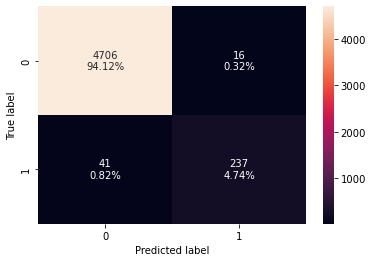

<IPython.core.display.Javascript object>

In [29]:
# creating confusion matrix

confusion_matrix_sklearn(XGB_tuned, X_val, Y_val)

### Notes

* Recall is 100% for training data -- high probability of over fitting 
* Recall is also high for the validation data -- another sign of over fitting 
* Not certain this is a good model 

## GridSearchCV Tests


### Notes
* Running a GridSearchCV tests are not required, but I wanted to do them anyway 
* Will compare the Accuracy, Recall, Percision, and F1 results between GridSearchCV and RandomizedSearchCV
* Will also compare the run times between GridSearchCV and RandomizedSearchCV  

### Gradient Boost Model Building with Under Sampling data

In [12]:
%%time

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = param_grid = { "n_estimators": np.arange(100,150,25), 
                           "learning_rate": [0.2, 0.05, 1], 
                           "subsample":[0.5,0.7], 
                           "max_features":[0.5,0.7] }

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, Y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)
print('\n')   # formatting for wall time

Best Parameters:{'learning_rate': 0.2, 'max_features': 0.5, 'n_estimators': 125, 'subsample': 0.7} 
Score: 0.7512733569006566


Wall time: 1min 16s


<IPython.core.display.Javascript object>

In [13]:
%%time 

GB_tuned_grid = GradientBoostingClassifier(random_state=1, learning_rate=0.2, max_features=0.5, n_estimators=125, 
                                           subsample=0.7)
GB_tuned_grid.fit(X_train, Y_train)

Wall time: 7.03 s


GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.7)

<IPython.core.display.Javascript object>

In [14]:
GB_train_grid = model_performance_classification_sklearn(GB_tuned_grid, X_train, Y_train)
print("Training performance:")
print(GB_train_grid.T)

GB_val_grid = model_performance_classification_sklearn(GB_tuned_grid, X_val, Y_val)
print("Validation performance:")
GB_val_grid.T

Training performance:
              0
Accuracy  0.994
Recall    0.915
Precision 0.981
F1        0.947
Validation performance:


,0
Accuracy,0.981
Recall,0.766
Precision,0.873
F1,0.816


<IPython.core.display.Javascript object>

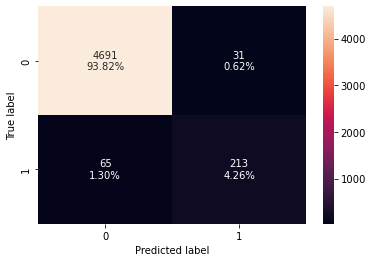

<IPython.core.display.Javascript object>

In [15]:
# creating confusion matrix

confusion_matrix_sklearn(GB_tuned_grid, X_val, Y_val)

### Notes

* Large difference between the training recall and validation recall
* Precision is also lower between training and validation
* Could be a workable model, but need to test the others

### AdaBoost Model Building with Over Sampling data

In [16]:
%%time

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [100, 150, 200], 
              "learning_rate": [0.2, 0.05], 
              "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), 
                                 DecisionTreeClassifier(max_depth=2, random_state=1), 
                                 DecisionTreeClassifier(max_depth=3, random_state=1), ] }

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, Y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

print('\n')   # formatting for wall time

Best Parameters:{'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'learning_rate': 0.2, 'n_estimators': 200} 
Score: 0.7632566192915374


Wall time: 3min


<IPython.core.display.Javascript object>

In [17]:
%%time 

Ada_tuned_grid = AdaBoostClassifier(random_state=1, n_estimators=200, learning_rate=0.2, 
                               base_estimator = DecisionTreeClassifier(max_depth=3, random_state=1))
Ada_tuned_grid.fit(X_train, Y_train)

Wall time: 34.1 s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200, random_state=1)

<IPython.core.display.Javascript object>

In [18]:
Ada_train_grid = model_performance_classification_sklearn(Ada_tuned_grid, X_train, Y_train)
print("Training performance:")
print(Ada_train_grid.T)

Ada_val_grid = model_performance_classification_sklearn(Ada_tuned_grid, X_val, Y_val)
print("Validation performance:")
Ada_val_grid.T

Training performance:
              0
Accuracy  0.999
Recall    0.984
Precision 1.000
F1        0.992
Validation performance:


,0
Accuracy,0.986
Recall,0.766
Precision,0.977
F1,0.859


<IPython.core.display.Javascript object>

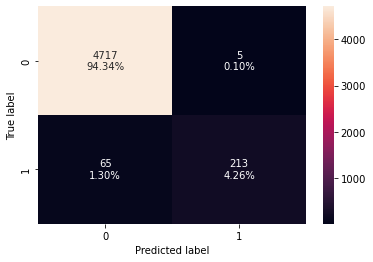

<IPython.core.display.Javascript object>

In [19]:
# creating confusion matrix

confusion_matrix_sklearn(Ada_tuned_grid, X_val, Y_val)

### Notes

* Large difference between the training recall and validation recall
* Training recall is also high -- could be over fitting
* Precision is also lower between training and validation
* Could be a workable model, but need to test the others

### Bagging Model Building with Over Sampling data

In [20]:
%%time

# defining model
model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9], 
              'n_estimators' : [30,50,70], }

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, Y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

print('\n')   # formatting for wall time

Best Parameters:{'max_features': 0.9, 'max_samples': 0.9, 'n_estimators': 50} 
Score: 0.7320395353870571


Wall time: 3min 43s


<IPython.core.display.Javascript object>

In [22]:
%%time 

Bag_tuned_grid = BaggingClassifier(random_state=1, n_estimators=50, max_samples=0.9, max_features=0.9)
Bag_tuned_grid.fit(X_train, Y_train)

Wall time: 28.3 s


BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

<IPython.core.display.Javascript object>

In [23]:
Bag_train_grid = model_performance_classification_sklearn(Bag_tuned_grid, X_train, Y_train)
print("Training performance:")
print(Bag_train_grid.T)

Bag_val_grid = model_performance_classification_sklearn(Bag_tuned_grid, X_val, Y_val)
print("Validation performance:")
Bag_val_grid.T

Training performance:
              0
Accuracy  0.999
Recall    0.987
Precision 1.000
F1        0.993
Validation performance:


,0
Accuracy,0.984
Recall,0.734
Precision,0.962
F1,0.833


<IPython.core.display.Javascript object>

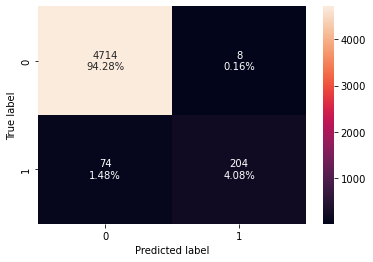

<IPython.core.display.Javascript object>

In [24]:
# creating confusion matrix

confusion_matrix_sklearn(Bag_tuned_grid, X_val, Y_val)

### Notes

* Accuracy and Precision are both high in training -- very good chance of over fitting
* Accuracy and Precision are also high for the validation data
* Large difference between the training recall and validation recall
* Cells also had a long run time, so model might be over built
* Not so certain this is a good model

### Random Forest Model Building with Under Sampling data

In [25]:
%%time

# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [200,250,300], 
              "min_samples_leaf": np.arange(1, 4), 
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], 
              "max_samples": np.arange(0.4, 0.7, 0.1) }

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, Y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

print('\n')   # formatting for wall time

Best Parameters:{'max_features': 'sqrt', 'max_samples': 0.6, 'min_samples_leaf': 1, 'n_estimators': 250} 
Score: 0.6996248466921577


Wall time: 2min 42s


<IPython.core.display.Javascript object>

In [26]:
%%time 

Ran_tuned_grid = RandomForestClassifier(random_state=1,n_estimators=250, min_samples_leaf=1, max_samples=0.6, 
                                   max_features='sqrt')

Ran_tuned_grid.fit(X_train, Y_train)

Wall time: 14.1 s


RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=250,
                       random_state=1)

<IPython.core.display.Javascript object>

In [27]:
Ran_train_grid = model_performance_classification_sklearn(Ran_tuned_grid, X_train, Y_train)
print("Training performance:")
print(Ran_train_grid.T)

Ran_val_grid = model_performance_classification_sklearn(Ran_tuned_grid, X_val, Y_val)
print("Validation performance:")
Ran_val_grid.T

Training performance:
              0
Accuracy  0.995
Recall    0.909
Precision 1.000
F1        0.952
Validation performance:


,0
Accuracy,0.983
Recall,0.712
Precision,0.985
F1,0.827


<IPython.core.display.Javascript object>

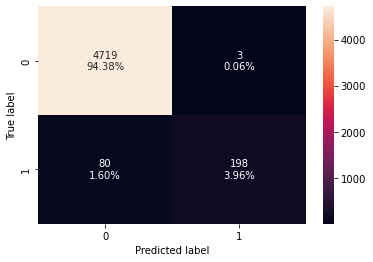

<IPython.core.display.Javascript object>

In [28]:
# creating confusion matrix

confusion_matrix_sklearn(Ran_tuned_grid, X_val, Y_val)

### Notes

* Large difference between the training recall and validation recall
* Accuracy and Precision are above 98.3% for both training and validation
* Points to overfitting
* Not certain this is a good model

### XGB Model Building with Under Sampling data

In [29]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomSearchCV
param_grid={ 'n_estimators': [150, 200, 250], 
            'scale_pos_weight': [5,10], 
            'learning_rate': [0.1,0.2], 
            'gamma': [0,3,5], 
            'subsample': [0.8,0.9] }

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, Y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

print('\n')   # formatting for wall time

Best Parameters:{'gamma': 3, 'learning_rate': 0.1, 'n_estimators': 250, 'scale_pos_weight': 10, 'subsample': 0.8} 
Score: 0.858206478609047


Wall time: 13min 16s


<IPython.core.display.Javascript object>

### Notes

* 13 minutes.  That is a long run time! 

In [30]:
%%time 

XGB_tuned_grid = XGBClassifier(random_state=1,eval_metric='logloss', subsample=0.8, scale_pos_weight=10, 
                          n_estimators=250, learning_rate=0.1, gamma=3)

XGB_tuned_grid.fit(X_train, Y_train)

Wall time: 4.25 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

In [31]:
XGB_train_grid = model_performance_classification_sklearn(XGB_tuned_grid, X_train, Y_train)
print("Training performance:")
print(XGB_train_grid.T)

XGB_val_grid = model_performance_classification_sklearn(XGB_tuned_grid, X_val, Y_val)
print("Validation performance:")
XGB_val_grid.T

Training performance:
              0
Accuracy  1.000
Recall    1.000
Precision 0.993
F1        0.996
Validation performance:


,0
Accuracy,0.989
Recall,0.849
Precision,0.952
F1,0.897


<IPython.core.display.Javascript object>

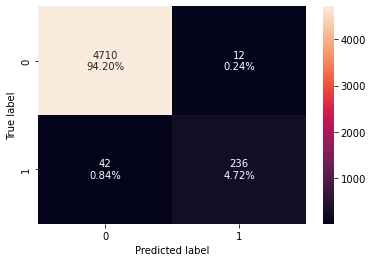

<IPython.core.display.Javascript object>

In [32]:
# creating confusion matrix

confusion_matrix_sklearn(XGB_tuned_grid, X_val, Y_val)

### Notes

* Recall is 100% for training data -- high probability of over fitting
* Recall is also high for the validation data -- another sign of over fitting
* Not certain this is a good model

## Model performance comparison and choosing the final model -- RandomSearchCV

In [33]:
# del models_train_comp_df

models_train_comp_df = pd.concat(
    [GB_train.T, Ada_train.T, Bag_train.T, Ran_train.T, XGB_train.T,], axis=1,
)

models_train_comp_df.columns = [
    "GradBoost Model with UnderSampling data",
    "AdaBoost Model with OverSampling data",
    "Bagging Model with OverSampling data",
    "RanForest Model Building with UnderSampling data",
    "XGB Model Building with UnderSampling data",
]


print(color.BOLD + "Training performance comparison:" + color.END)
models_train_comp_df

Training performance comparison:


,GradBoost Model with UnderSampling data,AdaBoost Model with OverSampling data,Bagging Model with OcerSampling data,RanForest Model Building with UnderSampling data,XGB Model Building with UnderSampling data
Accuracy,0.994,0.999,1.000,0.995,0.999
Recall,0.915,0.984,0.994,0.912,1.000
Precision,0.981,1.000,1.000,1.000,0.983
F1,0.947,0.992,0.997,0.954,0.992


<IPython.core.display.Javascript object>

In [34]:
# del models_val_comp_df     # in case this cell needs to be run again

models_val_comp_df = pd.concat(
    [GB_val.T, Ada_val.T, Bag_val.T, Ran_val.T, XGB_val.T,], axis=1,
)

models_val_comp_df.columns = [
    "GradBoost Model with UnderSampling data",
    "AdaBoost Model with OverSampling data",
    "Bagging Model with OverSampling data",
    "RanForest Model Building with UnderSampling data",
    "XGB Model Building with UnderSampling data",
]


print(color.BOLD + "valing performance comparison:" + color.END)
models_val_comp_df

valing performance comparison:


,GradBoost Model with UnderSampling data,AdaBoost Model with OverSampling data,Bagging Model with OverSampling data,RanForest Model Building with UnderSampling data,XGB Model Building with UnderSampling data
Accuracy,0.981,0.986,0.984,0.983,0.989
Recall,0.766,0.766,0.741,0.712,0.853
Precision,0.873,0.977,0.972,0.985,0.937
F1,0.816,0.859,0.841,0.827,0.893


<IPython.core.display.Javascript object>

In [35]:
# Make backup copy of results DataFrame to disk!

models_train_comp_df.to_csv("C:/Users/David/temp/MT_Project/models_train_comp_df.csv", index=False)
models_val_comp_df.to_csv("C:/Users/David/temp/MT_Project/models_val_comp_df.csv", index=False)

# models_train_comp_df = pd.read_csv("C:/Users/David/temp/MT_Project/odels_train_comp_df.csv")
# models_val_comp_df = pd.read_csv("C:/Users/David/temp/MT_Project/odels_val_comp_df.csv")


<IPython.core.display.Javascript object>

## Model performance comparison and choosing the final model -- GridSearchCV

In [33]:
# del models_train_grid_comp_df

models_train_grid_comp_grid_df = pd.concat(
    [GB_train_grid.T, Ada_train_grid.T, Bag_train_grid.T, Ran_train_grid.T, XGB_train_grid.T,], axis=1,
)

models_train_grid_comp_grid_df.columns = [
    "GradBoost Model with UnderSampling data",
    "AdaBoost Model with OverSampling data",
    "Bagging Model with OverSampling data",
    "RanForest Model Building with UnderSampling data",
    "XGB Model Building with UnderSampling data",
]


print(color.BOLD + "train_griding performance comparison:" + color.END)
models_train_grid_comp_grid_df

train_griding performance comparison:


,GradBoost Model with UnderSampling data,AdaBoost Model with OverSampling data,Bagging Model with OverSampling data,RanForest Model Building with UnderSampling data,XGB Model Building with UnderSampling data
Accuracy,0.994,0.999,0.999,0.995,1.000
Recall,0.915,0.984,0.987,0.909,1.000
Precision,0.981,1.000,1.000,1.000,0.993
F1,0.947,0.992,0.993,0.952,0.996


<IPython.core.display.Javascript object>

In [34]:
# del models_val_grid_comp_df     # in case this cell needs to be run again

models_val_grid_comp_grid_df = pd.concat(
    [GB_val_grid.T, Ada_val_grid.T, Bag_val_grid.T, Ran_val_grid.T, XGB_val_grid.T,], axis=1,
)

models_val_grid_comp_grid_df.columns = [
    "GradBoost Model with UnderSampling data",
    "AdaBoost Model with OverSampling data",
    "Bagging Model with OverSampling data",
    "RanForest Model Building with UnderSampling data",
    "XGB Model Building with UnderSampling data",
]


print(color.BOLD + "val_griding performance comparison:" + color.END)
models_val_grid_comp_grid_df

val_griding performance comparison:


,GradBoost Model with UnderSampling data,AdaBoost Model with OverSampling data,Bagging Model with OverSampling data,RanForest Model Building with UnderSampling data,XGB Model Building with UnderSampling data
Accuracy,0.981,0.986,0.984,0.983,0.989
Recall,0.766,0.766,0.734,0.712,0.849
Precision,0.873,0.977,0.962,0.985,0.952
F1,0.816,0.859,0.833,0.827,0.897


<IPython.core.display.Javascript object>

In [36]:
# Make backup copy of results DataFrame to disk!

models_train_grid_comp_grid_df.to_csv("C:/Users/David/temp/MT_Project/models_train_comp_grid_df.csv", index=False)
models_val_grid_comp_grid_df.to_csv("C:/Users/David/temp/MT_Project/models_val_comp_grid_df.csv", index=False)

# models_train_grid_comp_grid_df = pd.read_csv("C:/Users/David/temp/MT_Project/odels_train_comp_grid_df.csv")
# models_val_grid_comp_grid_df = pd.read_csv("C:/Users/David/temp/MT_Project/odels_val_comp_grid_df.csv")

<IPython.core.display.Javascript object>

## Observations and Model Selection 

### Notes on Performance 
* Cell performance was measured on local machine with 8 cores, 16 virtualized cores, running up to 4 GHz
* Memory and disk activity was flat during the runs 
    * CPU bound processing 
* XGB and Boosting went to 100% CPU during their runs 
* All other models used around 20% CPU during their runs 


### Method Calls 

* The results generated by GridSearchCV and RandomSearchCV are the same in many cases or very close to each other in some cases
* GridSearchCV tended to over fit the data for many models like XGB and RanForest Model Building with UnderSampling data  
    * Too much model generation may be a bad thing 
* As advertised, RandomSearchCV performs the same as GridSearchCV in much shorter time
    * In this case, RandomSearchCV was able to generate model parameters in single digit times while GridSearchCV took double digit times
* RandomSearchCV appears to have generated more precise models than GridSearchCV 
    * Too much model generation may be a bad thing 
    
    
### Model Selection 
* XGB Model Building with UnderSampling data 
    * The recall numbers for both GridSearchCV and RandomSearchCV are too high 
    * Precision is also very high for both methods 
    * The model is over fitting 
    * This model is out 
* Random Forest (RanForest) Model Building with UnderSampling data
* Bagging Model with OverSampling data
    * Note: Combining the models as my interpretation is the same for both models 
    * Recall numbers are very high for the training data 
    * There is a large difference between the recall values for training when compared to validation 
        * This is the case for both methods -- GridSearchCV and RandomSearchCV
    * Precision is also very high for training and then lower for validation for both methods -- GridSearchCV and RandomSearchCV
    * These models are out 
* AdaBoost Model with OverSampling data
    * Recall is good in training for both GridSearchCV and RandomSearchCV 
    * Recall is also good for validation for both GridSearchCV and RandomSearchCV 
    * Recall is highest in validation with the exception of XGB Model Building with UnderSampling data 
        * XGB Model Building with UnderSampling data is over fitting 
    * Precision is also good in training and validation for both GridSearchCV and RandomSearchCV  
    * Possible model to select 
* GradBoost Model with UnderSampling data 
    * Recall is good in training for both GridSearchCV and RandomSearchCV 
    * Recall is also good for validation for both GridSearchCV and RandomSearchCV 
    * Recall is highest in validation with the exception of XGB Model Building with UnderSampling data 
    * Precision is also good in training and validation for both GridSearchCV and RandomSearchCV  
        * Precision is lower than AdaBoost Model with OverSampling data
    * Possible model to select 


### Final Selection 

AdaBoost Model with OverSampling data

* Recall is good in training for both GridSearchCV and RandomSearchCV 
* Recall is also good for validation for both GridSearchCV and RandomSearchCV 
* Recall is highest in validation with the exception of XGB Model Building with UnderSampling data 
* Precision is also good in training and validation for both GridSearchCV and RandomSearchCV  

GradBoost Model with UnderSampling data is also a good model, but its precision score is lower than AdaBoost Model with OverSampling data.  

### Test set final performance -- AdaBoost Model with OverSampling data

In [23]:
# Generating the validation results for comparison to the test results 

Ada_val = model_performance_classification_sklearn(Ada_tuned, X_val, Y_val)
print("Validation performance:")
Ada_val.T

Validation performance:


,0
Accuracy,0.986
Recall,0.766
Precision,0.977
F1,0.859


<IPython.core.display.Javascript object>

In [54]:
# Generating the test results for comparison to the validation results

Ada_test = model_performance_classification_sklearn(Ada_tuned, X_test, Y_test)
print("Test performance:")
Ada_test.T

Test performance:


,0
Accuracy,0.985
Recall,0.759
Precision,0.964
F1,0.849


<IPython.core.display.Javascript object>

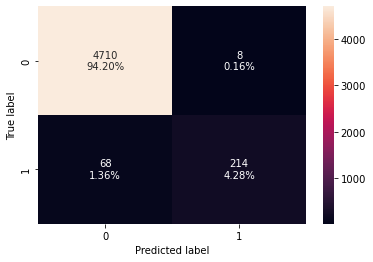

<IPython.core.display.Javascript object>

In [46]:
# creating confusion matrix

confusion_matrix_sklearn(Ada_tuned, X_test, Y_test)

### Notes

* The validation and test results are similar, not quite the same, but similar  
* The model should generalize well 

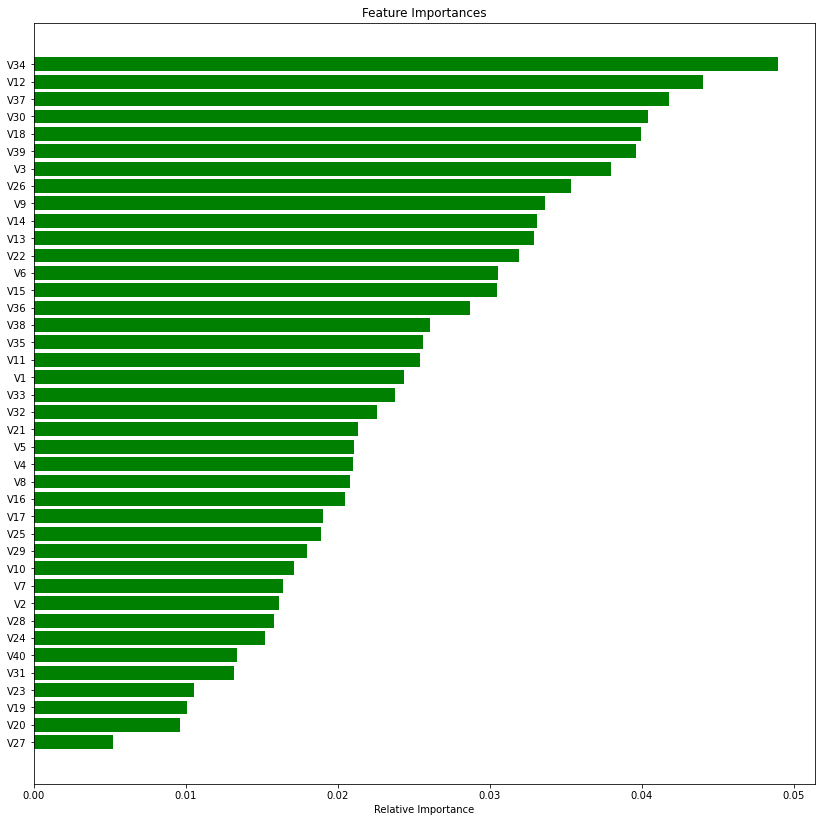

<IPython.core.display.Javascript object>

In [11]:
feature_names = X.columns
importances = Ada_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(14, 14))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Test set final performance -- GradBoost Model with UnderSampling

I got curious.  I want to see what the performance of the Gradiant Boost with under sampling is like on the test data.  So I ran this test. I think Gradiant Boost with under sampling would be a good backup test or a way to cross check the data. 

In [13]:
# Generating the validation results for comparison to the test results 

GB_val = model_performance_classification_sklearn(GB_tuned, X_val, Y_val)
print("Validation performance:")
GB_val.T

Validation performance:


,0
Accuracy,0.981
Recall,0.766
Precision,0.873
F1,0.816


<IPython.core.display.Javascript object>

In [14]:
# Generating the test results for comparison to the validation results

Ada_test = model_performance_classification_sklearn(GB_tuned, X_test, Y_test)
print("Test performance:")
Ada_test.T

Test performance:


,0
Accuracy,0.981
Recall,0.755
Precision,0.891
F1,0.818


<IPython.core.display.Javascript object>

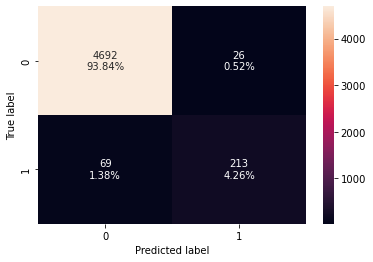

<IPython.core.display.Javascript object>

In [15]:
# creating confusion matrix

confusion_matrix_sklearn(GB_tuned, X_test, Y_test)

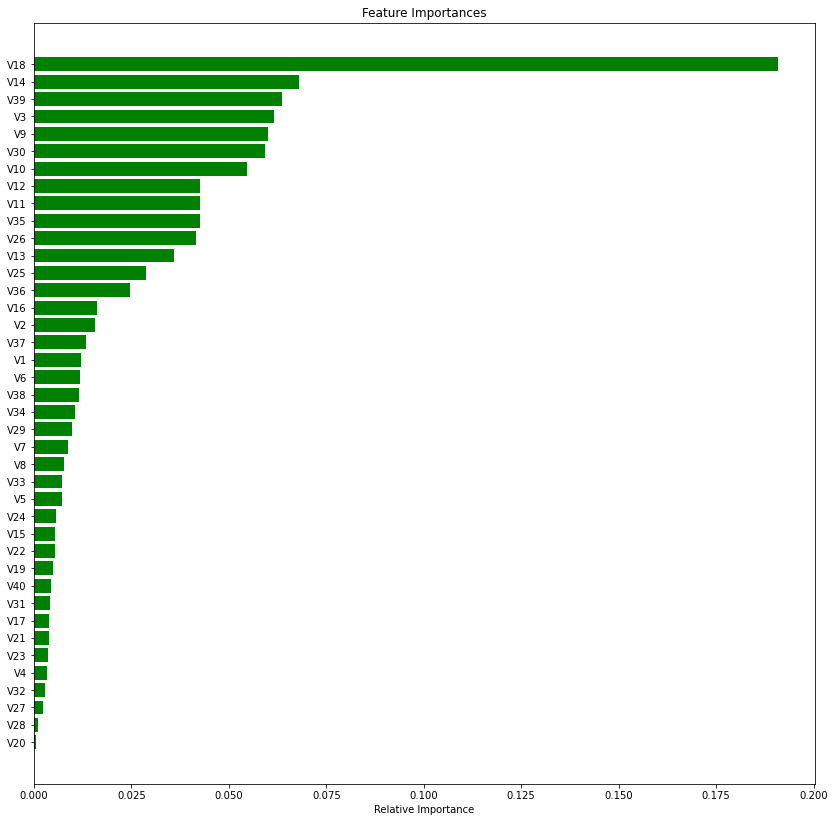

<IPython.core.display.Javascript object>

In [16]:
feature_names = X.columns
importances = GB_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(14, 14))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Pipelines to build the final model

Still going with AdaBoost Model with OverSampling data as the final model, but Gradiant Boost Model with Under Sampling data is a VERY close second.  It might be worth it to test each model more in the future. 

In [47]:
# creating a list of numerical variables
numerical_features = [
    "V1",
"V2",
"V3",
"V4",
"V5",
"V6",
"V7",
"V8", 
"V9",
"V10",
"V11",
"V12",
"V13",
"V14",
"V15",
"V16",
"V17",
"V18",
"V19",
"V20",
"V21",
"V22",
"V23",
"V24",
"V25",
"V26",
"V27",
"V28",
"V29",
"V30",
"V31",
"V32",
"V33",
"V34",
"V35",
"V36",
"V37",
"V38",
"V39",
"V40",
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, numerical_features)],remainder="passthrough",)


<IPython.core.display.Javascript object>

In [39]:
X = df.drop(["Target"], axis=1)
Y = df["Target"]


<IPython.core.display.Javascript object>

In [40]:
# Splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(15000, 40) (5000, 40)


<IPython.core.display.Javascript object>

In [48]:
%%time

# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "AdaBoost",
            AdaBoostClassifier(
                random_state=1,
                n_estimators=200,
                learning_rate=0.2,
                base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, Y_train)

Wall time: 33.8 s


Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28', 'V29',
                                                   'V30', ...])])),
                ('AdaBoost',
                 AdaBoostClas

<IPython.core.display.Javascript object>

In [49]:
Model_test = model_performance_classification_sklearn(model, X_test, Y_test)
Model_test.T

,0
Accuracy,0.985
Recall,0.759
Precision,0.964
F1,0.849


<IPython.core.display.Javascript object>

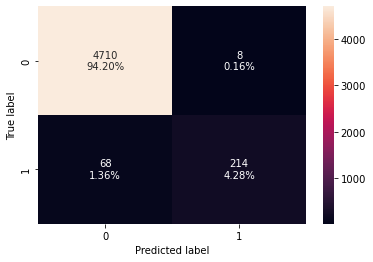

<IPython.core.display.Javascript object>

In [50]:
# creating confusion matrix

confusion_matrix_sklearn(model, X_test, Y_test)

### Notes

* The pipeline worked and produced the same results 

# Business Insights

The leading causes of failures in wind turbines: 
* Bearings 
* Gears 
* Lubrication 
* Filtration  

Condensation caused by high humidity can also lead to electrical failures 

The top 10 predictors are: 
1. V32
2. V12
3. V37
4. V30 
5. V18 
6. V39 
7. V3
8. V26 
9. V9 
10. V14

* Of the 20,000 observations in the training set, 18,890 or 94.5% did not fail for the reported observations
* 1110 observations or 5.56% did fail for the reported observation  
* Overall, the correct set of predictors is being used 
* Some predictors like V2 and V14 that are highly correlated -- additional information is required to determine if both predictors are needed for the models 
* As with any tuning, the last 5% will be the hardest to achieve 

# Conclusions

1. Use the AdaBoost Model with Over Sampling data as the model to determine failure or no failure 
    * See Future Recommendations for additional suggestions 
2. In the majority of cases, the given predictors did accurately predict no failure 
3. The model will limit the replacement costs and inspection costs when a replacement or inspection is not warranted 
4. The model will find the True Positives and True Negatives 
5. The chosen model should generalize well 

# Future Recommendations

1. Expand the number of observations to determine if the results change 
2. Add month and/or season to determine if there is any correlation between a failure and time of year 
3. Out of scope for this project, but consider funding further testing to determine if the AdaBoost Model with Over Sampling data or the Gradiant Boost Model with Under Sampling data is the most ideal model 
    * Determine if and how the hyperparameters need to be modified or changed 
4. Develop a stacking model to use both AdaBoost Model with Over Sampling data and the Gradiant Boost Model with Under Sampling data
    * The two models produce very similar results 
5. The IEEE and other organizations have a number of research papers on predictive maintenance for wind turbines 
